# Merge Embeddings

In [1]:
import pandas as pd
df_all = pd.read_json('dataset/df_multi_tasks.json')
print('Number of entries:', len(df_all))
# Count of rows where km, kcat, and kcatkm are not None
not_none_km = df_all['km'].dropna()
not_none_kcat = df_all['kcat'].dropna()
not_none_kcatkm = df_all['kcatkm'].dropna()

# Count of rows where all three (km, kcat, kcatkm) are not None
not_none_all = df_all.dropna(subset=['km', 'kcat', 'kcatkm']).shape[0]

# Output the results
print(f"Rows with non-None km: {len(not_none_km)}")
print(f"Rows with non-None kcat: {len(not_none_kcat)}")
print(f"Rows with non-None kcatkm: {len(not_none_kcatkm)}")
print(f"Rows where km, kcat, and kcatkm are all non-None: {not_none_all}")

# protein
df_esm2 = pd.read_pickle('inferred_functions/results/df_esm2.pkl')
df_esmc = pd.read_json('inferred_functions/results/df_esmc.json')
df_unirep = pd.read_pickle('inferred_functions/results/df_unirep.pkl')
df_prott5 = pd.read_json('inferred_functions/results/df_protT5.json')
df_prostt5 = pd.read_json('inferred_functions/results/df_prostT5.json')
for df_ in [df_esm2, df_esmc, df_unirep, df_prott5, df_prostt5]:
    df_.columns = ['sequence', df_.columns[1]]

# substrate
df_molebert = pd.read_json('inferred_functions/results/df_molebert.json')
df_transsmiles = pd.read_json('inferred_functions/results/df_transsmiles.json')
df_prostt5.head()

Number of entries: 46936
Rows with non-None km: 43117
Rows with non-None kcat: 30204
Rows with non-None kcatkm: 19917
Rows where km, kcat, and kcatkm are all non-None: 16886


,sequence,prost5
0,MSIIKSYAAKEAGSELELYEYDAGELRPEDVEVQVDYCGICHSDLS...,"[0.0017113135, -0.0303871855, -0.0036463677, 0..."
2,MDIDRLFSVKGMNAVVLGASSGIGKAIAEMFSEMGGKVVLSDIDEE...,"[-0.0041703084, -0.047611132300000004, -0.0069..."
4,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[0.014685850600000001, -0.013136651400000001, ..."
17,MKAAVVREKNDGFVDLIDDWKPRELGFGDALVDVEYCGLCHTDLHC...,"[0.0067027789, -0.0202605408, 0.0079605039, -0..."
18,MKAAVVEQFKEPLKIKEVEKPTISYGEVLVRIKACGVCHTDLHAAH...,"[0.0307265427, -0.020222706700000002, -0.00979..."


In [2]:
# merge
df_all = pd.merge(df_all, df_esm2, on='sequence', how='left')
df_all = pd.merge(df_all, df_esmc, on='sequence', how='left')
df_all = pd.merge(df_all, df_unirep, on='sequence', how='left')
df_all = pd.merge(df_all, df_prott5, on='sequence', how='left')
df_all = pd.merge(df_all, df_prostt5, on='sequence', how='left')

df_all = pd.merge(df_all, df_molebert, on='smiles', how='left')
df_all = pd.merge(df_all, df_transsmiles, on='smiles', how='left')
print(f"Total entries after merging embeddings: {len(df_all)}")

columns_to_check = ['esm2', 'esmc', 'unirep', 'prott5', 'prost5', 'molebert', 'transsmiles']
df_all = df_all.dropna(subset=columns_to_check)
print(f"Total entries after drop none: {len(df_all)}")
df_all.head()

Total entries after merging embeddings: 46936
Total entries after drop none: 46534


,ec,organism,uniprot,substrate,ph,t,type,position,sequence,smiles,km,kcat,kcatkm,esm2,esmc,unirep,prott5,prost5,molebert,transsmiles
0,3.5.5.1,Saccharolobus solfataricus,P95896,trichloroacetonitrile,7.4,70.0,wild,None,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,C(#N)C(Cl)(Cl)Cl,5.000000e-10,0.010,NaN,"[0.07309095, -0.085310504, 0.03223636, -0.0094...","[-0.0025727174, 0.0081991823, -0.0278216563, 0...","[0.004618997, 0.04178079, 0.039039593, -0.0533...","[0.0620778725, 0.0053198822, 0.026737025, -0.0...","[0.0229359791, -0.0089250933, -0.0310355425000...","[-0.0235576797, -0.1898318082, -0.005378013, 0...","[-0.1102231815, -0.2566757202, 0.2837018669, 0..."
1,1.21.99.4,Homo sapiens,,L-thyroxine,7.5,37.0,mutant,P135S,MGLPQPGLWLKRLWVLLEVAVHVVVGKVLLILFPDRVKRNILAMGE...,C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=...,1.700000e-09,NaN,NaN,"[0.054237492, -0.04574185, 0.008709021, 0.0387...","[0.0067151301, 0.0108078318, -0.0142306937, -0...","[0.009288959, 0.11994403, 0.08886064, -0.00835...","[0.0137849757, 0.0193469338, 0.0360138603, 0.0...","[-0.0300230943, -0.0246387329, -0.0323411487, ...","[0.11776212600000001, 0.24018001560000002, -0....","[-0.049280483300000004, -0.2168657631, 0.30448..."
2,1.21.99.4,Homo sapiens,,L-thyroxine,7.5,37.0,wild,None,MGLPQPGLWLKRLWVLLEVAVHVVVGKVLLILFPDRVKRNILAMGE...,C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=...,2.900000e-09,NaN,NaN,"[0.054237492, -0.04574185, 0.008709021, 0.0387...","[0.0067151301, 0.0108078318, -0.0142306937, -0...","[0.009288959, 0.11994403, 0.08886064, -0.00835...","[0.0137849757, 0.0193469338, 0.0360138603, 0.0...","[-0.0300230943, -0.0246387329, -0.0323411487, ...","[0.11776212600000001, 0.24018001560000002, -0....","[-0.049280483300000004, -0.2168657631, 0.30448..."
3,3.5.5.1,Saccharolobus solfataricus,P95896,Cinnamonitrile,7.4,70.0,mutant,K96R,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,C1=CC=C(C=C1)C=CC#N,9.700000e-09,0.016,NaN,"[0.07308519, -0.08452837, 0.029972142, -0.0119...","[-0.0028213528, 0.0087356633, -0.0282284711, 0...","[0.0046866684999999995, 0.04164683, 0.03819374...","[0.0622685216, 0.0037881299, 0.027366610200000...","[0.022653413900000002, -0.008009411400000001, ...","[0.1382588446, -0.2295262814, -0.0154548008, 0...","[-0.07580477000000001, -0.26762363310000004, 0..."
4,3.5.5.1,Saccharolobus solfataricus,P95896,Malononitrile,7.4,70.0,wild,None,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,C(C#N)C#N,4.950000e-08,0.140,NaN,"[0.07309095, -0.085310504, 0.03223636, -0.0094...","[-0.0025727174, 0.0081991823, -0.0278216563, 0...","[0.004618997, 0.04178079, 0.039039593, -0.0533...","[0.0620778725, 0.0053198822, 0.026737025, -0.0...","[0.0229359791, -0.0089250933, -0.0310355425000...","[0.4168405533, -0.2187459022, -0.1292698383, 0...","[-0.0909005329, -0.2873343229, 0.2866819799, 0..."


# Transform Labels to log10 and Calculate logP, MW

In [3]:
import numpy as np

column_names = ['ec', 'organism', 'uniprot', 'substrate', 'smiles', 'sequence', 'type', 'ph', 't', 'esm2', 'esmc', 'unirep', 'prott5', 'prost5', 'molebert', 'transsmiles', 'logkm', 'logkcat', 'logkcatkm']

# 对指定列进行对数变换
for column_to_log in ['km', 'kcat', 'kcatkm']:
    # 对每一列进行安全对数变换
    df_all['log'+column_to_log] = df_all[column_to_log].apply(
        lambda x: np.log(x) if pd.notnull(x) and x > 0 else np.nan
    )
df_all_log_transformed = df_all[column_names]
df_all_log_transformed.head()

,ec,organism,uniprot,substrate,smiles,sequence,type,ph,t,esm2,esmc,unirep,prott5,prost5,molebert,transsmiles,logkm,logkcat,logkcatkm
0,3.5.5.1,Saccharolobus solfataricus,P95896,trichloroacetonitrile,C(#N)C(Cl)(Cl)Cl,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,wild,7.4,70.0,"[0.07309095, -0.085310504, 0.03223636, -0.0094...","[-0.0025727174, 0.0081991823, -0.0278216563, 0...","[0.004618997, 0.04178079, 0.039039593, -0.0533...","[0.0620778725, 0.0053198822, 0.026737025, -0.0...","[0.0229359791, -0.0089250933, -0.0310355425000...","[-0.0235576797, -0.1898318082, -0.005378013, 0...","[-0.1102231815, -0.2566757202, 0.2837018669, 0...",-21.416413,-4.605170,NaN
1,1.21.99.4,Homo sapiens,,L-thyroxine,C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=...,MGLPQPGLWLKRLWVLLEVAVHVVVGKVLLILFPDRVKRNILAMGE...,mutant,7.5,37.0,"[0.054237492, -0.04574185, 0.008709021, 0.0387...","[0.0067151301, 0.0108078318, -0.0142306937, -0...","[0.009288959, 0.11994403, 0.08886064, -0.00835...","[0.0137849757, 0.0193469338, 0.0360138603, 0.0...","[-0.0300230943, -0.0246387329, -0.0323411487, ...","[0.11776212600000001, 0.24018001560000002, -0....","[-0.049280483300000004, -0.2168657631, 0.30448...",-20.192638,NaN,NaN
2,1.21.99.4,Homo sapiens,,L-thyroxine,C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=...,MGLPQPGLWLKRLWVLLEVAVHVVVGKVLLILFPDRVKRNILAMGE...,wild,7.5,37.0,"[0.054237492, -0.04574185, 0.008709021, 0.0387...","[0.0067151301, 0.0108078318, -0.0142306937, -0...","[0.009288959, 0.11994403, 0.08886064, -0.00835...","[0.0137849757, 0.0193469338, 0.0360138603, 0.0...","[-0.0300230943, -0.0246387329, -0.0323411487, ...","[0.11776212600000001, 0.24018001560000002, -0....","[-0.049280483300000004, -0.2168657631, 0.30448...",-19.658555,NaN,NaN
3,3.5.5.1,Saccharolobus solfataricus,P95896,Cinnamonitrile,C1=CC=C(C=C1)C=CC#N,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,mutant,7.4,70.0,"[0.07308519, -0.08452837, 0.029972142, -0.0119...","[-0.0028213528, 0.0087356633, -0.0282284711, 0...","[0.0046866684999999995, 0.04164683, 0.03819374...","[0.0622685216, 0.0037881299, 0.027366610200000...","[0.022653413900000002, -0.008009411400000001, ...","[0.1382588446, -0.2295262814, -0.0154548008, 0...","[-0.07580477000000001, -0.26762363310000004, 0...",-18.451140,-4.135167,NaN
4,3.5.5.1,Saccharolobus solfataricus,P95896,Malononitrile,C(C#N)C#N,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,wild,7.4,70.0,"[0.07309095, -0.085310504, 0.03223636, -0.0094...","[-0.0025727174, 0.0081991823, -0.0278216563, 0...","[0.004618997, 0.04178079, 0.039039593, -0.0533...","[0.0620778725, 0.0053198822, 0.026737025, -0.0...","[0.0229359791, -0.0089250933, -0.0310355425000...","[0.4168405533, -0.2187459022, -0.1292698383, 0...","[-0.0909005329, -0.2873343229, 0.2866819799, 0...",-16.821293,-1.966113,NaN


In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import warnings
warnings.filterwarnings('ignore')
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

def calculate_properties(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError(f"invalid SMILES: {smiles}")

        logp = Descriptors.MolLogP(mol)
        mw = Descriptors.MolWt(mol)
        return logp, mw
    except Exception as e:
        print(f"Failed: {e}")
        return np.NAN, np.NAN

df_all_log_transformed[['logp', 'mw']] = df_all_log_transformed['smiles'].apply(lambda x: pd.Series(calculate_properties(x)))
df_all_log_transformed.to_pickle('dataset/df_all_log_transformed.pkl')
df_all_log_transformed.head()

,ec,organism,uniprot,substrate,smiles,sequence,type,ph,t,esm2,...,unirep,prott5,prost5,molebert,transsmiles,logkm,logkcat,logkcatkm,logp,mw
0,3.5.5.1,Saccharolobus solfataricus,P95896,trichloroacetonitrile,C(#N)C(Cl)(Cl)Cl,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,wild,7.4,70.0,"[0.07309095, -0.085310504, 0.03223636, -0.0094...",...,"[0.004618997, 0.04178079, 0.039039593, -0.0533...","[0.0620778725, 0.0053198822, 0.026737025, -0.0...","[0.0229359791, -0.0089250933, -0.0310355425000...","[-0.0235576797, -0.1898318082, -0.005378013, 0...","[-0.1102231815, -0.2566757202, 0.2837018669, 0...",-21.416413,-4.605170,NaN,1.88018,144.388
1,1.21.99.4,Homo sapiens,,L-thyroxine,C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=...,MGLPQPGLWLKRLWVLLEVAVHVVVGKVLLILFPDRVKRNILAMGE...,mutant,7.5,37.0,"[0.054237492, -0.04574185, 0.008709021, 0.0387...",...,"[0.009288959, 0.11994403, 0.08886064, -0.00835...","[0.0137849757, 0.0193469338, 0.0360138603, 0.0...","[-0.0300230943, -0.0246387329, -0.0323411487, ...","[0.11776212600000001, 0.24018001560000002, -0....","[-0.049280483300000004, -0.2168657631, 0.30448...",-20.192638,NaN,NaN,4.55730,776.872
2,1.21.99.4,Homo sapiens,,L-thyroxine,C1=C(C=C(C(=C1I)OC2=CC(=C(C(=C2)I)O)I)I)CC(C(=...,MGLPQPGLWLKRLWVLLEVAVHVVVGKVLLILFPDRVKRNILAMGE...,wild,7.5,37.0,"[0.054237492, -0.04574185, 0.008709021, 0.0387...",...,"[0.009288959, 0.11994403, 0.08886064, -0.00835...","[0.0137849757, 0.0193469338, 0.0360138603, 0.0...","[-0.0300230943, -0.0246387329, -0.0323411487, ...","[0.11776212600000001, 0.24018001560000002, -0....","[-0.049280483300000004, -0.2168657631, 0.30448...",-19.658555,NaN,NaN,4.55730,776.872
3,3.5.5.1,Saccharolobus solfataricus,P95896,Cinnamonitrile,C1=CC=C(C=C1)C=CC#N,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,mutant,7.4,70.0,"[0.07308519, -0.08452837, 0.029972142, -0.0119...",...,"[0.0046866684999999995, 0.04164683, 0.03819374...","[0.0622685216, 0.0037881299, 0.027366610200000...","[0.022653413900000002, -0.008009411400000001, ...","[0.1382588446, -0.2295262814, -0.0154548008, 0...","[-0.07580477000000001, -0.26762363310000004, 0...",-18.451140,-4.135167,NaN,2.22338,129.162
4,3.5.5.1,Saccharolobus solfataricus,P95896,Malononitrile,C(C#N)C#N,MGIKLPTLEDLREISKQFNLDLEDEELKSFLQLLKLQLESYERLDS...,wild,7.4,70.0,"[0.07309095, -0.085310504, 0.03223636, -0.0094...",...,"[0.004618997, 0.04178079, 0.039039593, -0.0533...","[0.0620778725, 0.0053198822, 0.026737025, -0.0...","[0.0229359791, -0.0089250933, -0.0310355425000...","[0.4168405533, -0.2187459022, -0.1292698383, 0...","[-0.0909005329, -0.2873343229, 0.2866819799, 0...",-16.821293,-1.966113,NaN,0.42366,66.063


# Statistical sequences length

In [5]:
# Count the number of unique values in the 'ec' column
ec_unique_count = df_all_log_transformed['ec'].nunique()

# uniprot
uniprot_unique_count = df_all_log_transformed['uniprot'].nunique()

# sequence
sequence_unique_count = df_all_log_transformed['sequence'].nunique()

# smiles
smiles_unique_count = df_all_log_transformed['smiles'].nunique()

# wild and mutant in type
type_wild_count = df_all_log_transformed[df_all_log_transformed['type'] == 'wild'].shape[0]
type_mutant_count = df_all_log_transformed[df_all_log_transformed['type'] == 'mutant'].shape[0]
type_none_count = df_all_log_transformed[pd.isna(df_all_log_transformed['type'])].shape[0]
type_recombinant_count = df_all_log_transformed[df_all_log_transformed['type'] == 'recombinant'].shape[0]

print(f"Number of unique values in 'ec' column: {ec_unique_count}")
print(f"Number of unique values in 'uniprot' column: {uniprot_unique_count}")
print(f"Number of unique values in 'sequence' column: {sequence_unique_count}")
print(f"Number of unique values in 'smiles' column: {smiles_unique_count}")
print(f"Number of 'wild' in 'type' column: {type_wild_count + type_none_count}")
print(f"Number of 'mutant' in 'type' column: {type_mutant_count}")
print(f"Number of 'recombinant' in 'type' column: {type_recombinant_count}")

Number of unique values in 'ec' column: 2844
Number of unique values in 'uniprot' column: 5455
Number of unique values in 'sequence' column: 16659
Number of unique values in 'smiles' column: 3734
Number of 'wild' in 'type' column: 18840
Number of 'mutant' in 'type' column: 24430
Number of 'recombinant' in 'type' column: 3264


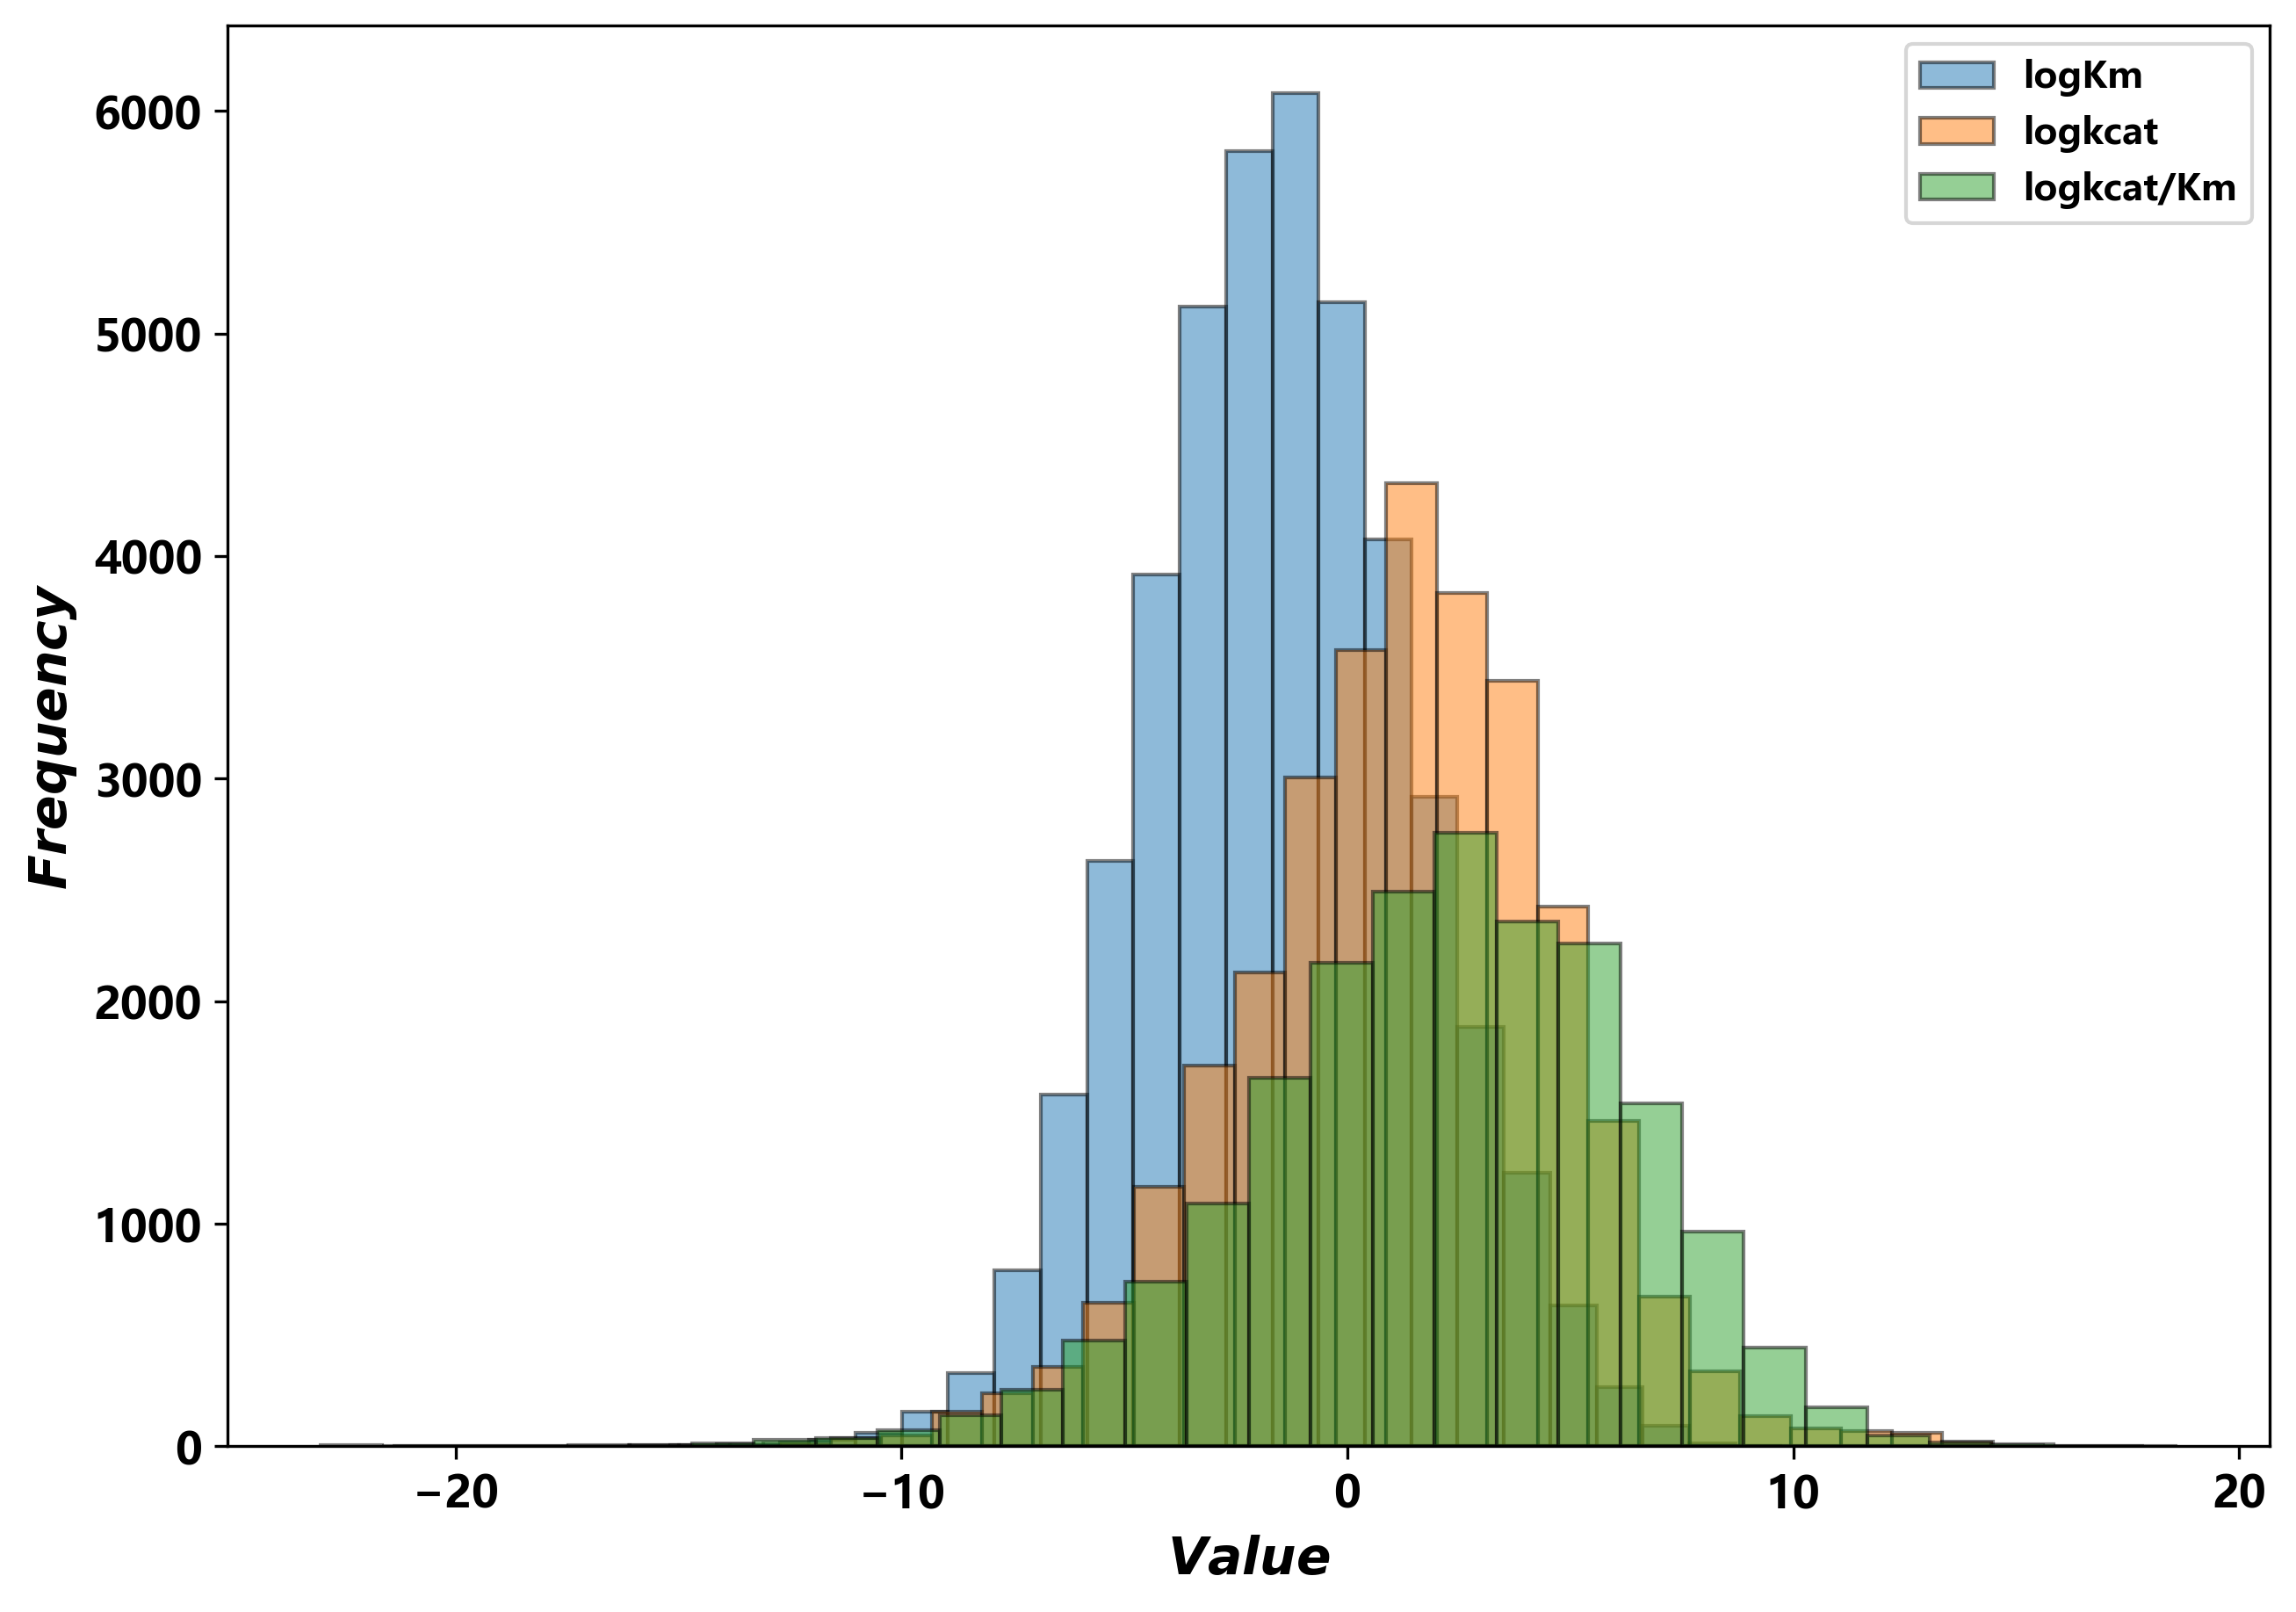

Max sequence length: 1970
Min sequence length: 9


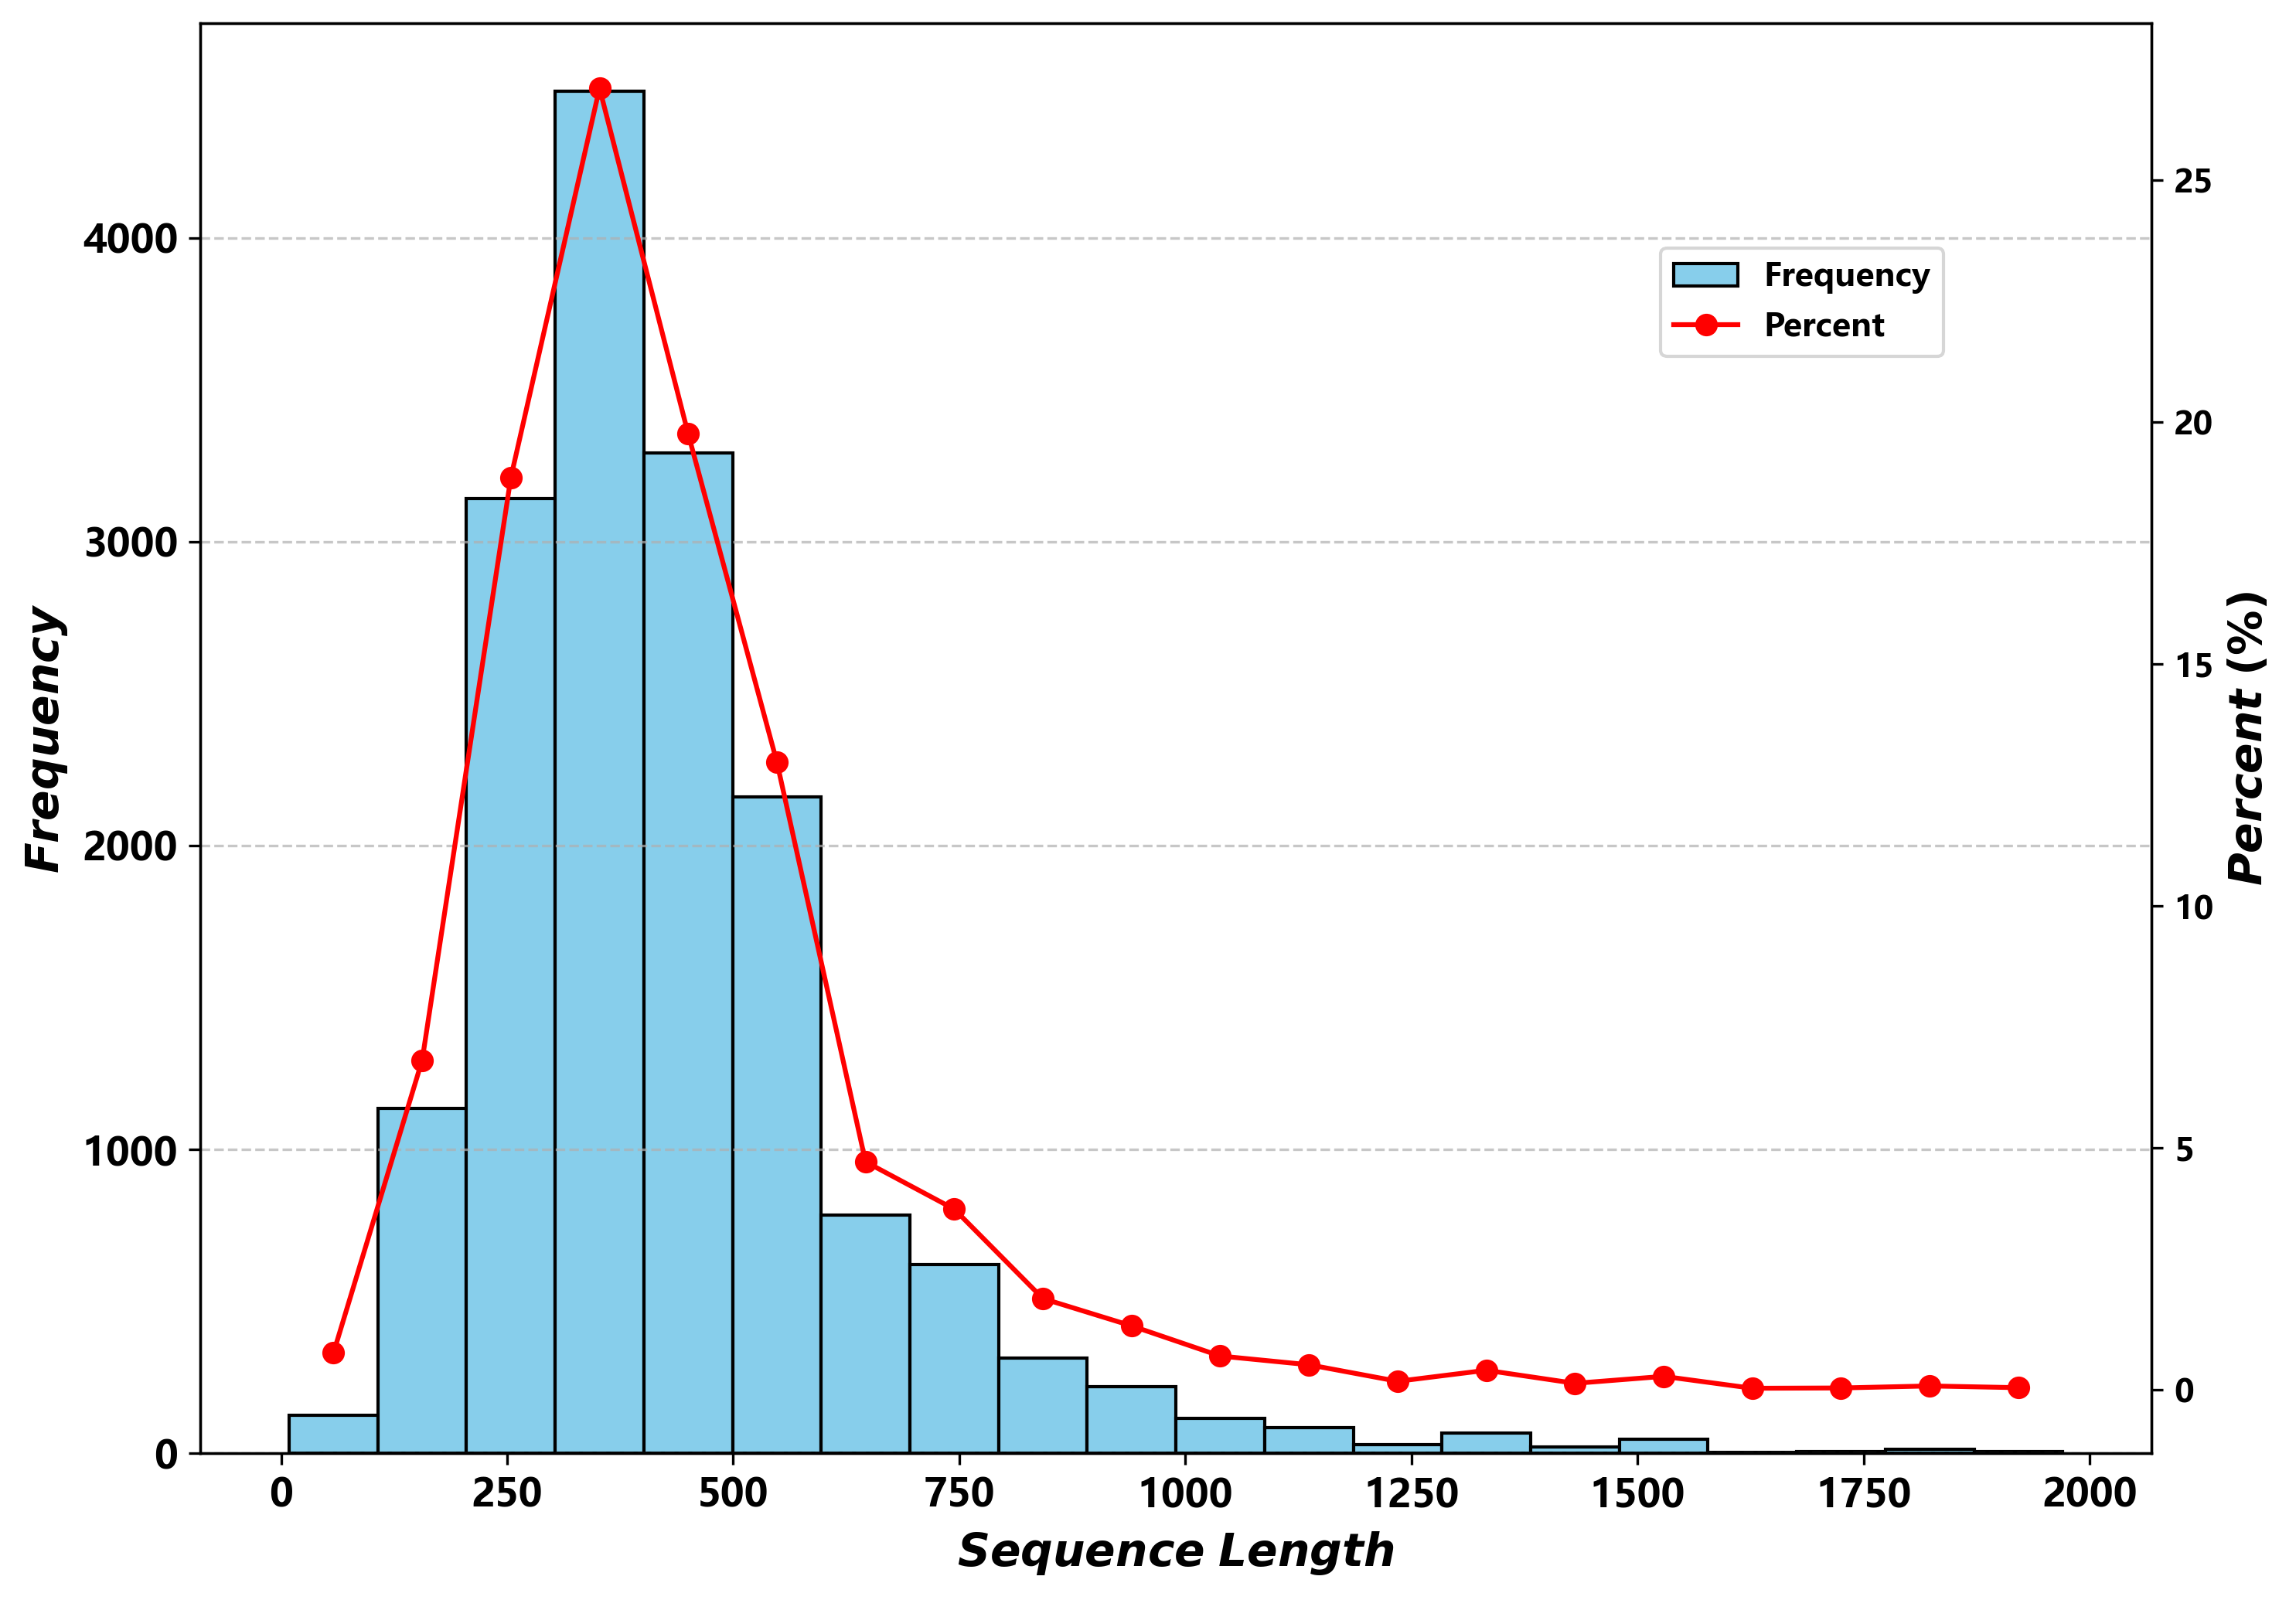

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
import matplotlib
matplotlib.rc("font",family='MicroSoft YaHei',weight="bold")


def plot_histograms(data, columns, dataset_name, save_path):
    fig = plt.figure(figsize=(10, 7), dpi=300)
    ax = fig.add_subplot(111)
    for column in columns:
        if column == 'logkm':
            label = 'logKm'
        elif column == 'logkcatkm':
            label = 'logkcat/Km'
        else:
            label = column
        plt.hist(data[column], bins=30, alpha=0.5, label=label, edgecolor='black')
    # plt.title(f"{dataset_name} Distribution", fontsize=12)
    plt.xlabel("$Value$", fontsize=14)
    plt.ylabel("$Frequency$", fontsize=14)
    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.grid(False)  # 取消网格线
    plt.savefig(save_path, dpi=300)
    plt.show()
    plt.close()

# plot 3 labels histogram
columns_to_plot = ['logkm', 'logkcat', 'logkcatkm']
plot_histograms(df_all_log_transformed, columns_to_plot, f"Full Dataset", f"./figures/full_set_distribution.png")

# plot length of sequences
input_sequences = df_all_log_transformed['sequence'].drop_duplicates()
sequence_lengths = [len(seq) for seq in input_sequences]
max_length = max(sequence_lengths)
min_length = min(sequence_lengths)

print(f'Max sequence length: {max_length}')
print(f'Min sequence length: {min_length}')

# plot histogram
bins = 20  # 直方图的分组数
counts, bin_edges = np.histogram(sequence_lengths, bins=bins)
percent = (counts / sum(counts)) * 100  # 转换为百分比

fig = plt.figure(figsize=(10, 7), dpi=300)
ax1 = fig.add_subplot(111)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
width = bin_edges[1] - bin_edges[0]
ax1.bar(bin_centers, counts, width=width, color='skyblue', edgecolor='black', label='Frequency')
ax1.set_xlabel('$Sequence$ $Length$', fontsize=14)
ax1.set_ylabel('$Frequency$', fontsize=14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# plot percent
ax2 = ax1.twinx()
ax2.plot(bin_centers, percent, color='red', marker='o', linestyle='-', label='Percent')
ax2.set_ylabel('$Percent$ $(\%)$', fontsize=14)
ax2.tick_params(axis='y')

fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
# plt.title("Sequence Length Distribution", fontsize=16)
plt.grid(False)  # 取消网格线
plt.tight_layout()

plt.savefig("./figures/unique_sequences_length_distribution.png", dpi=300)
plt.show()

# Split Dataset by 5 Folds and Save Dataset

Fold 1: Train set length = 29781, Validation set length = 7446


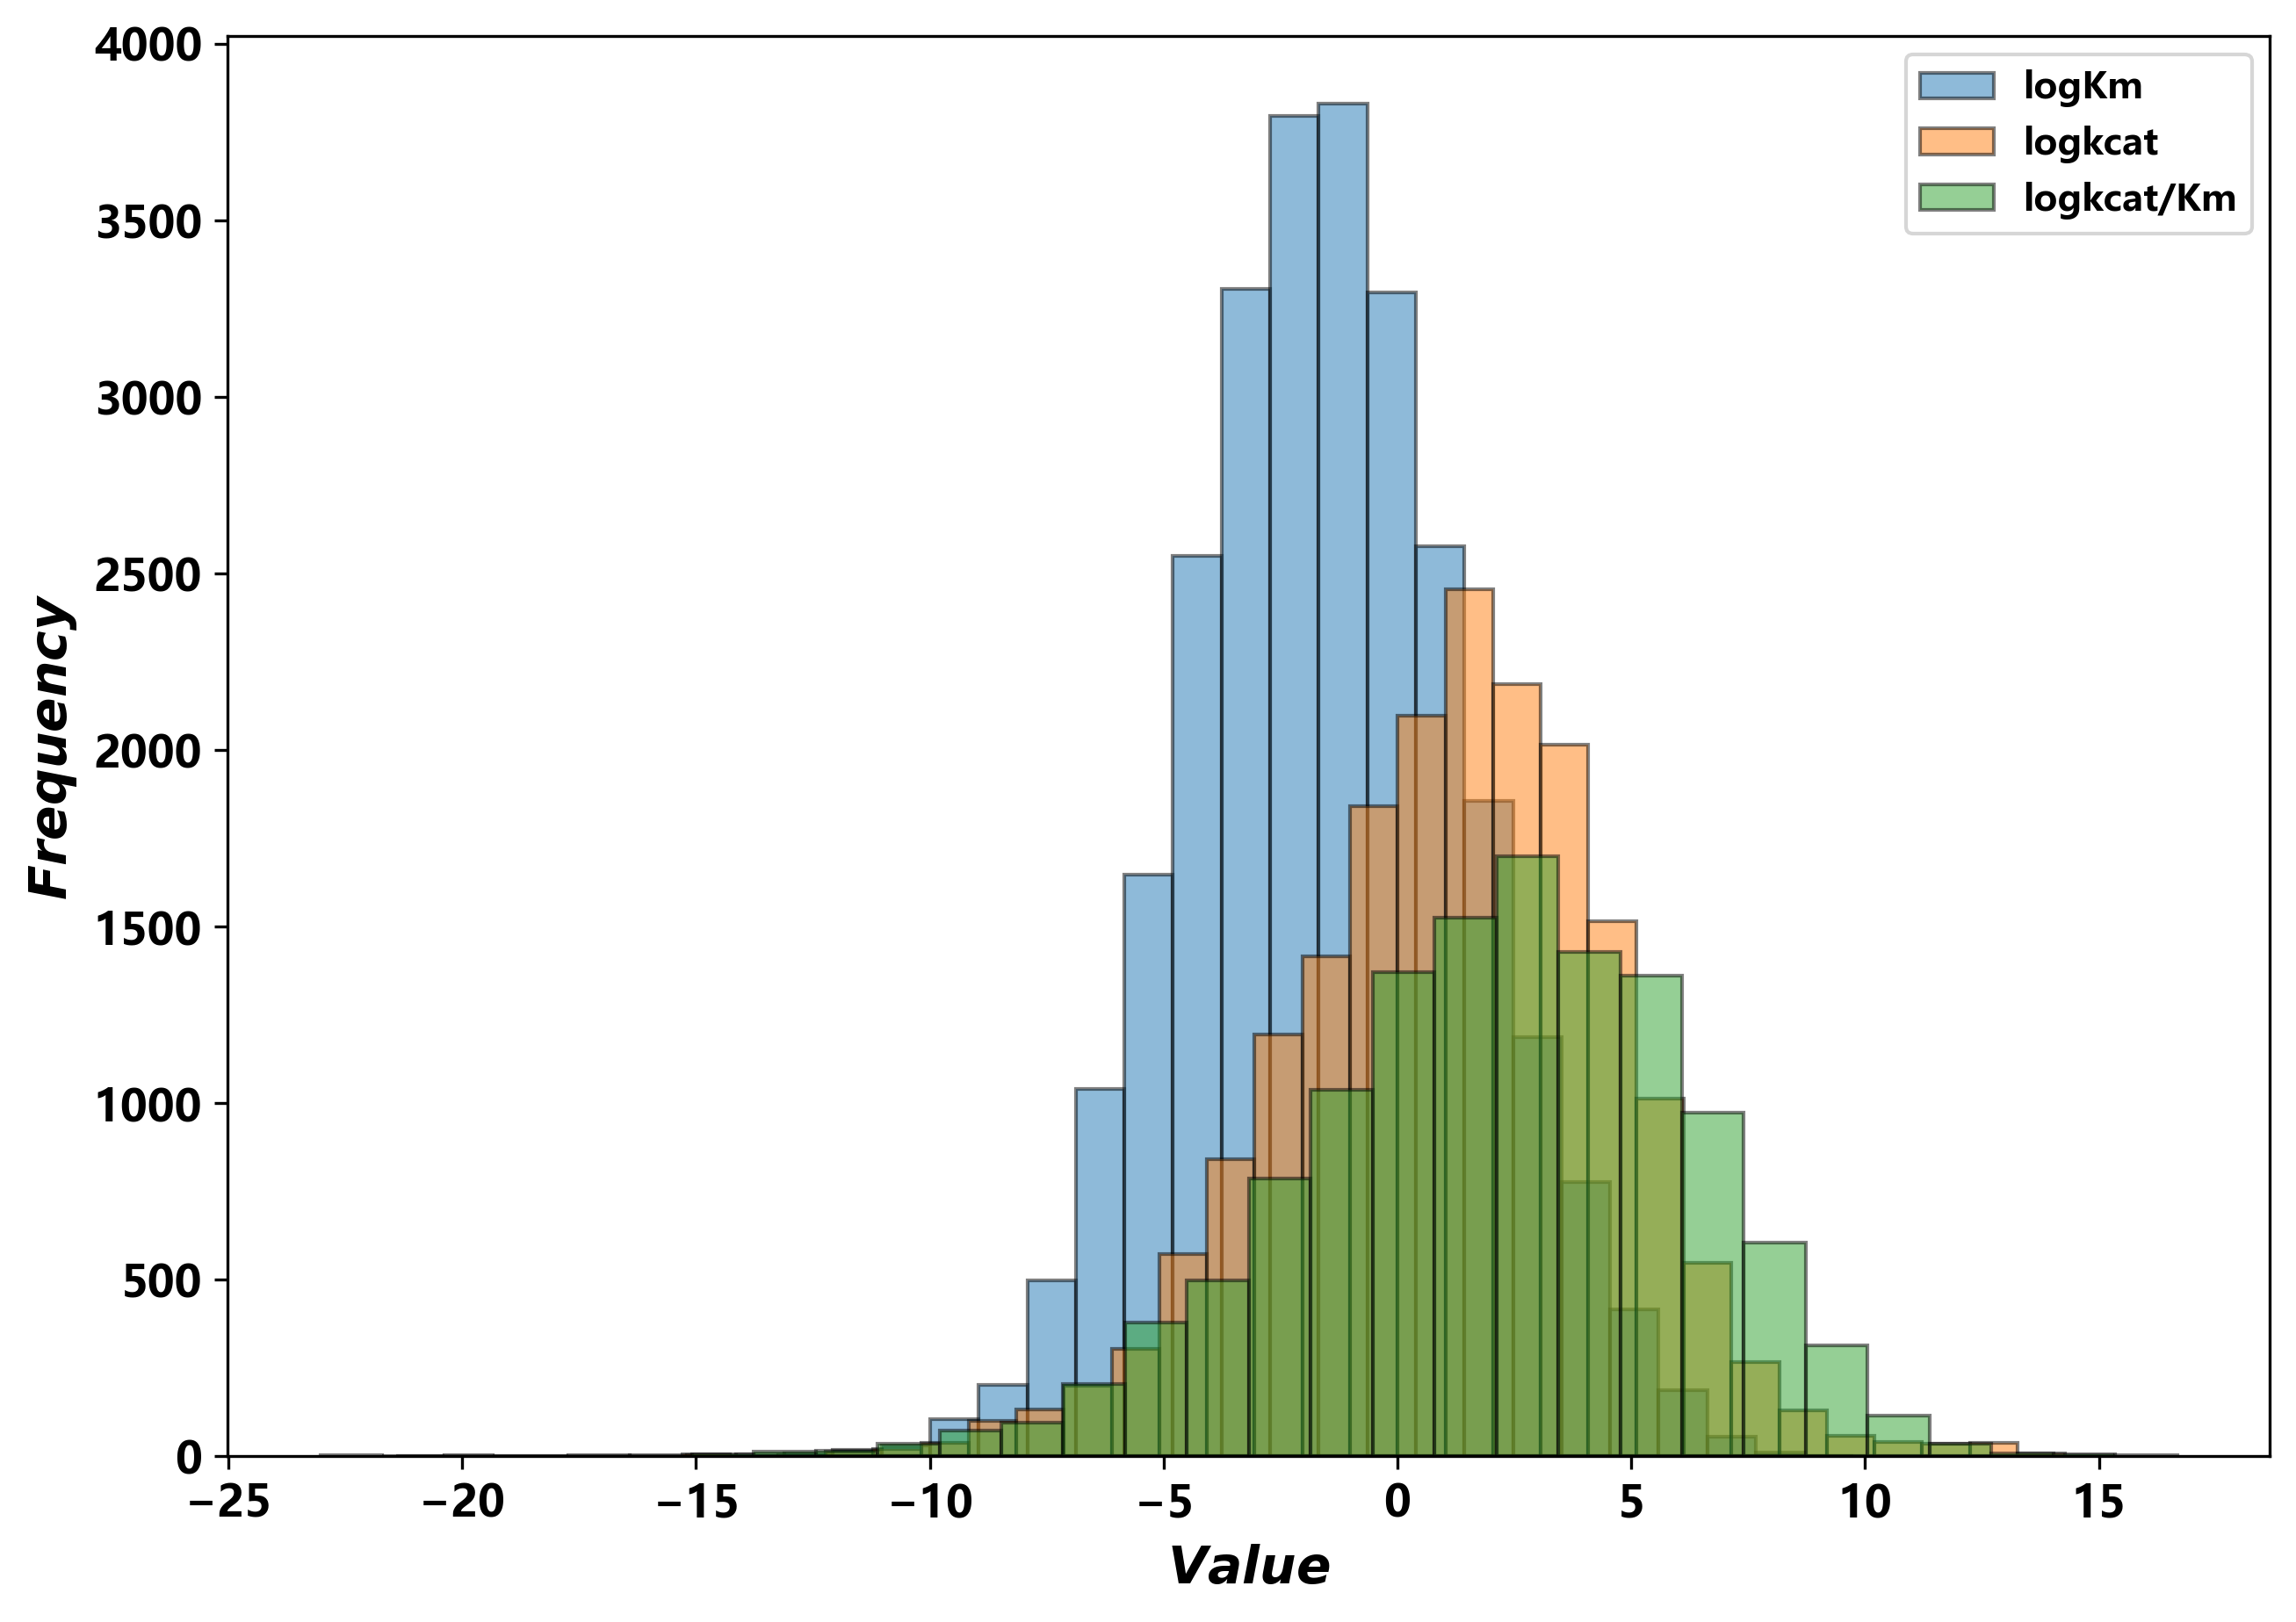

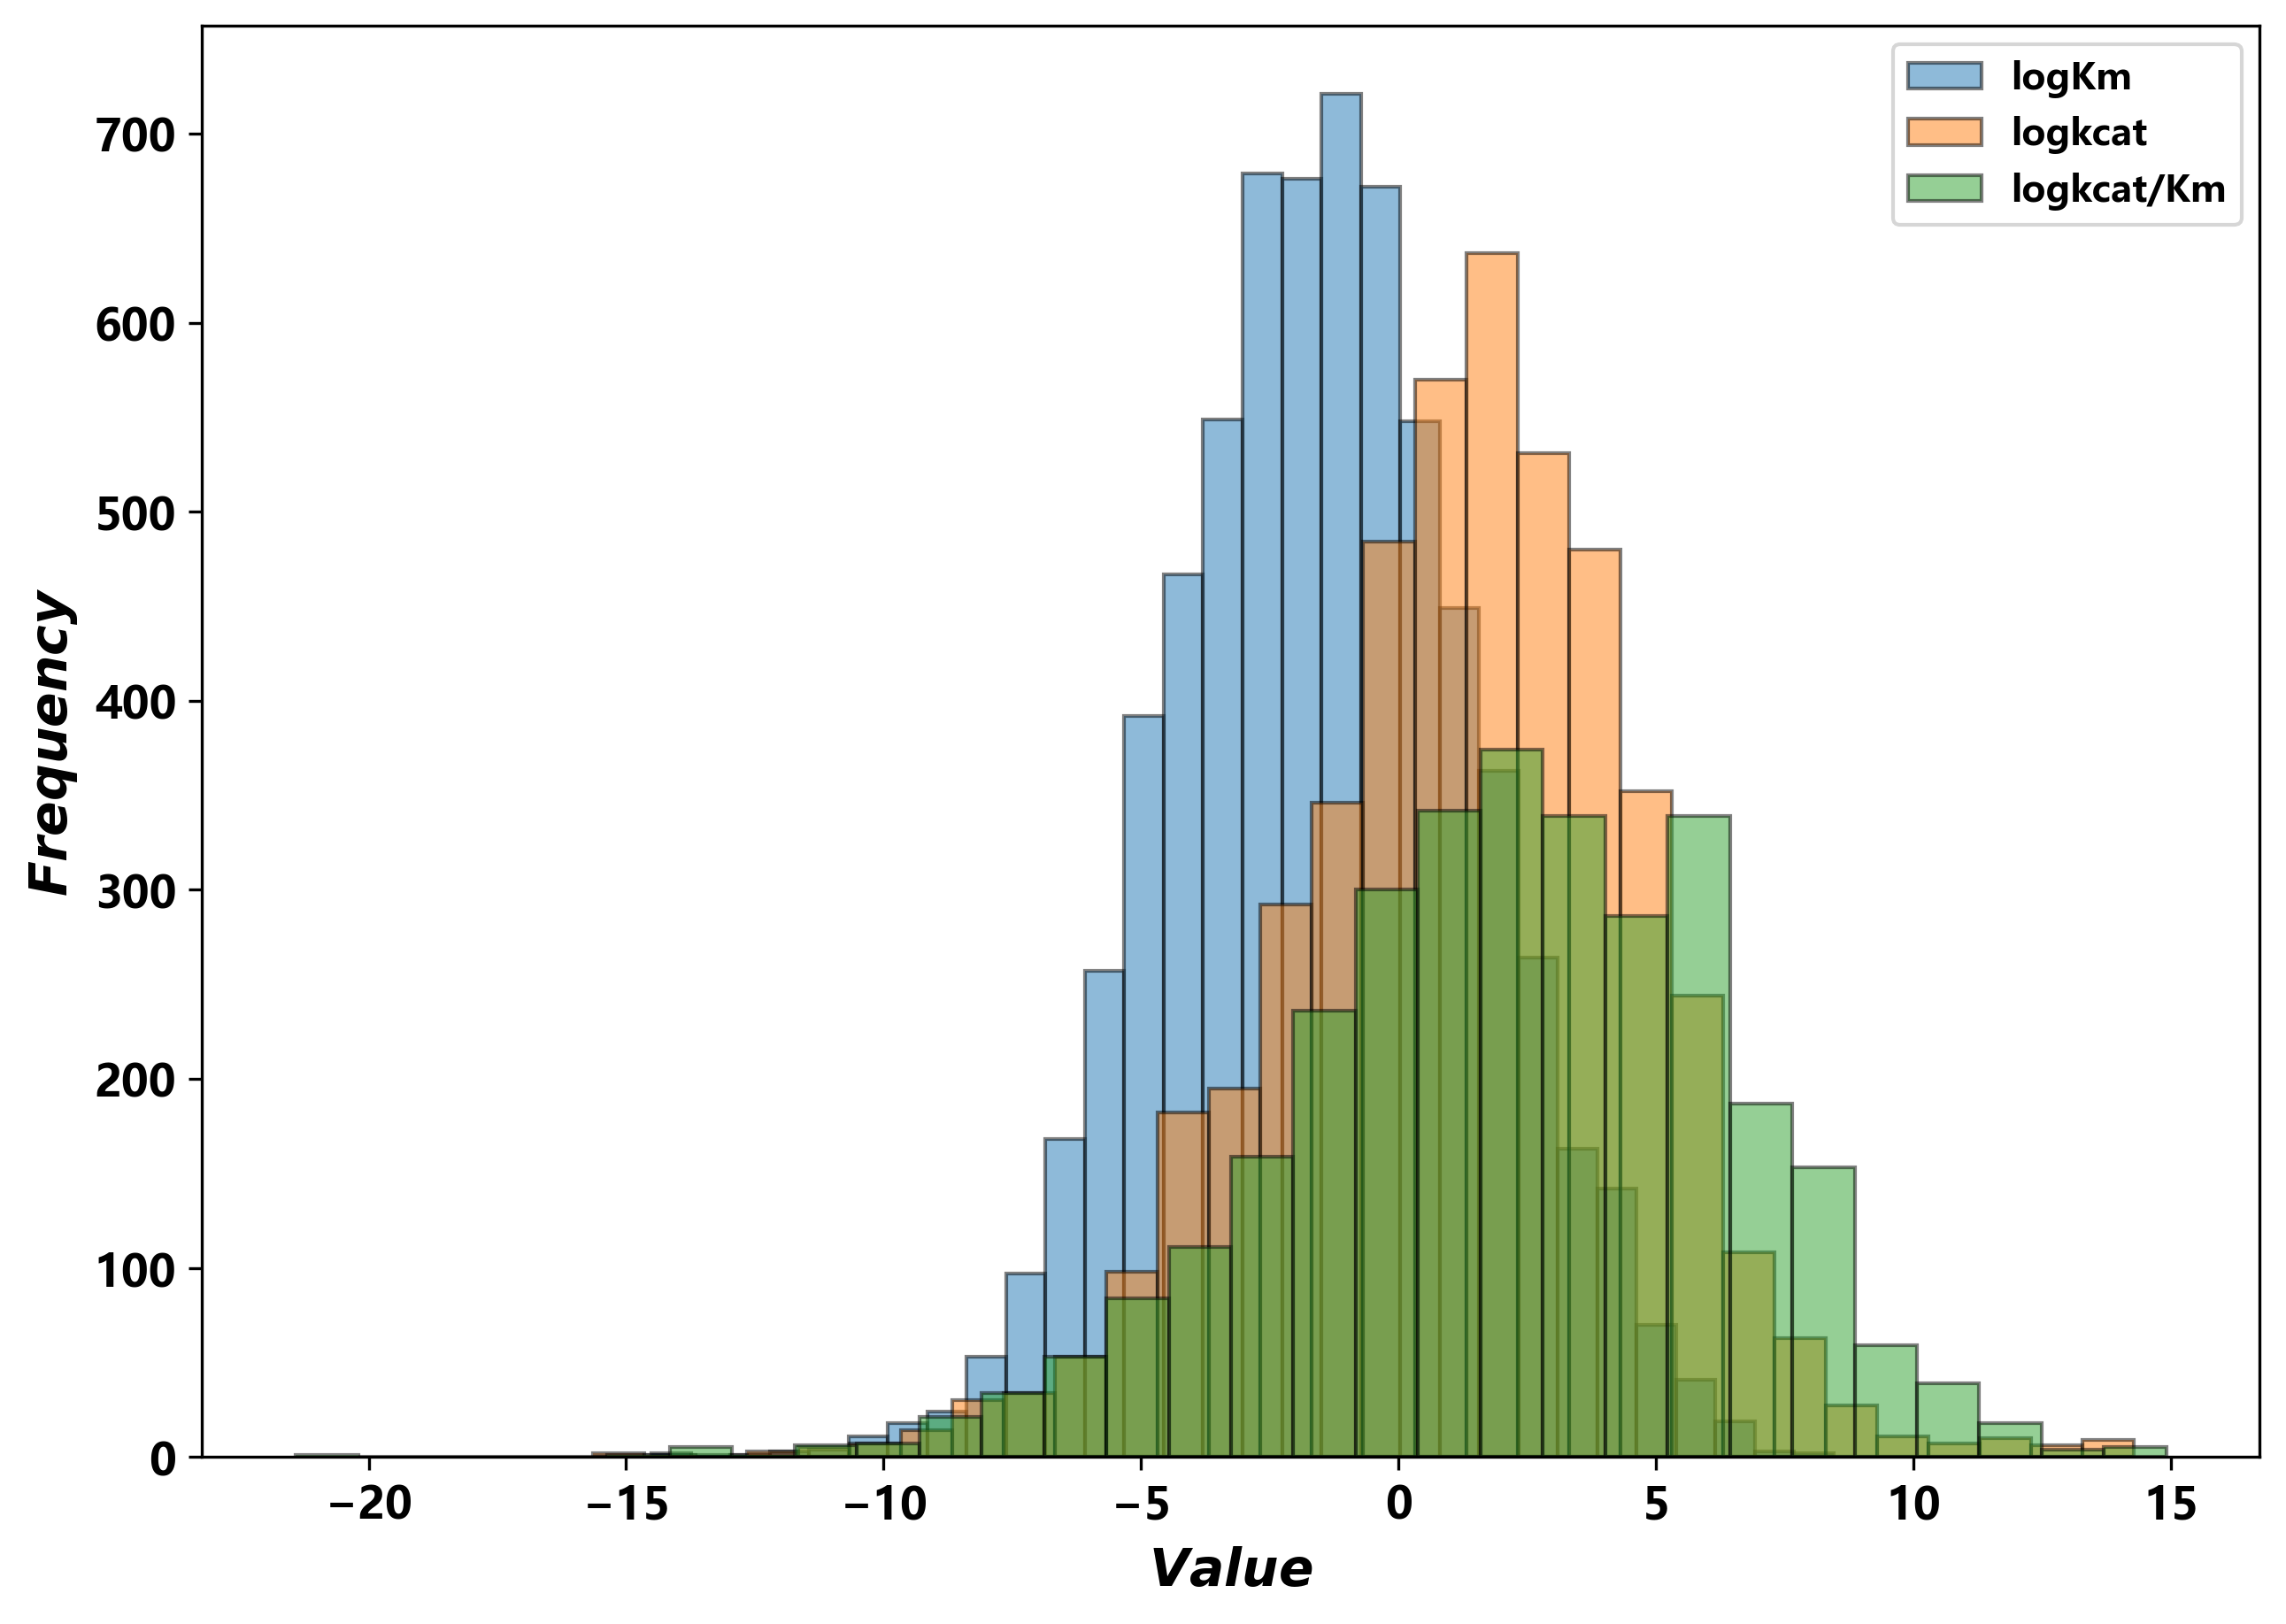

Fold 2: Train set length = 29781, Validation set length = 7446


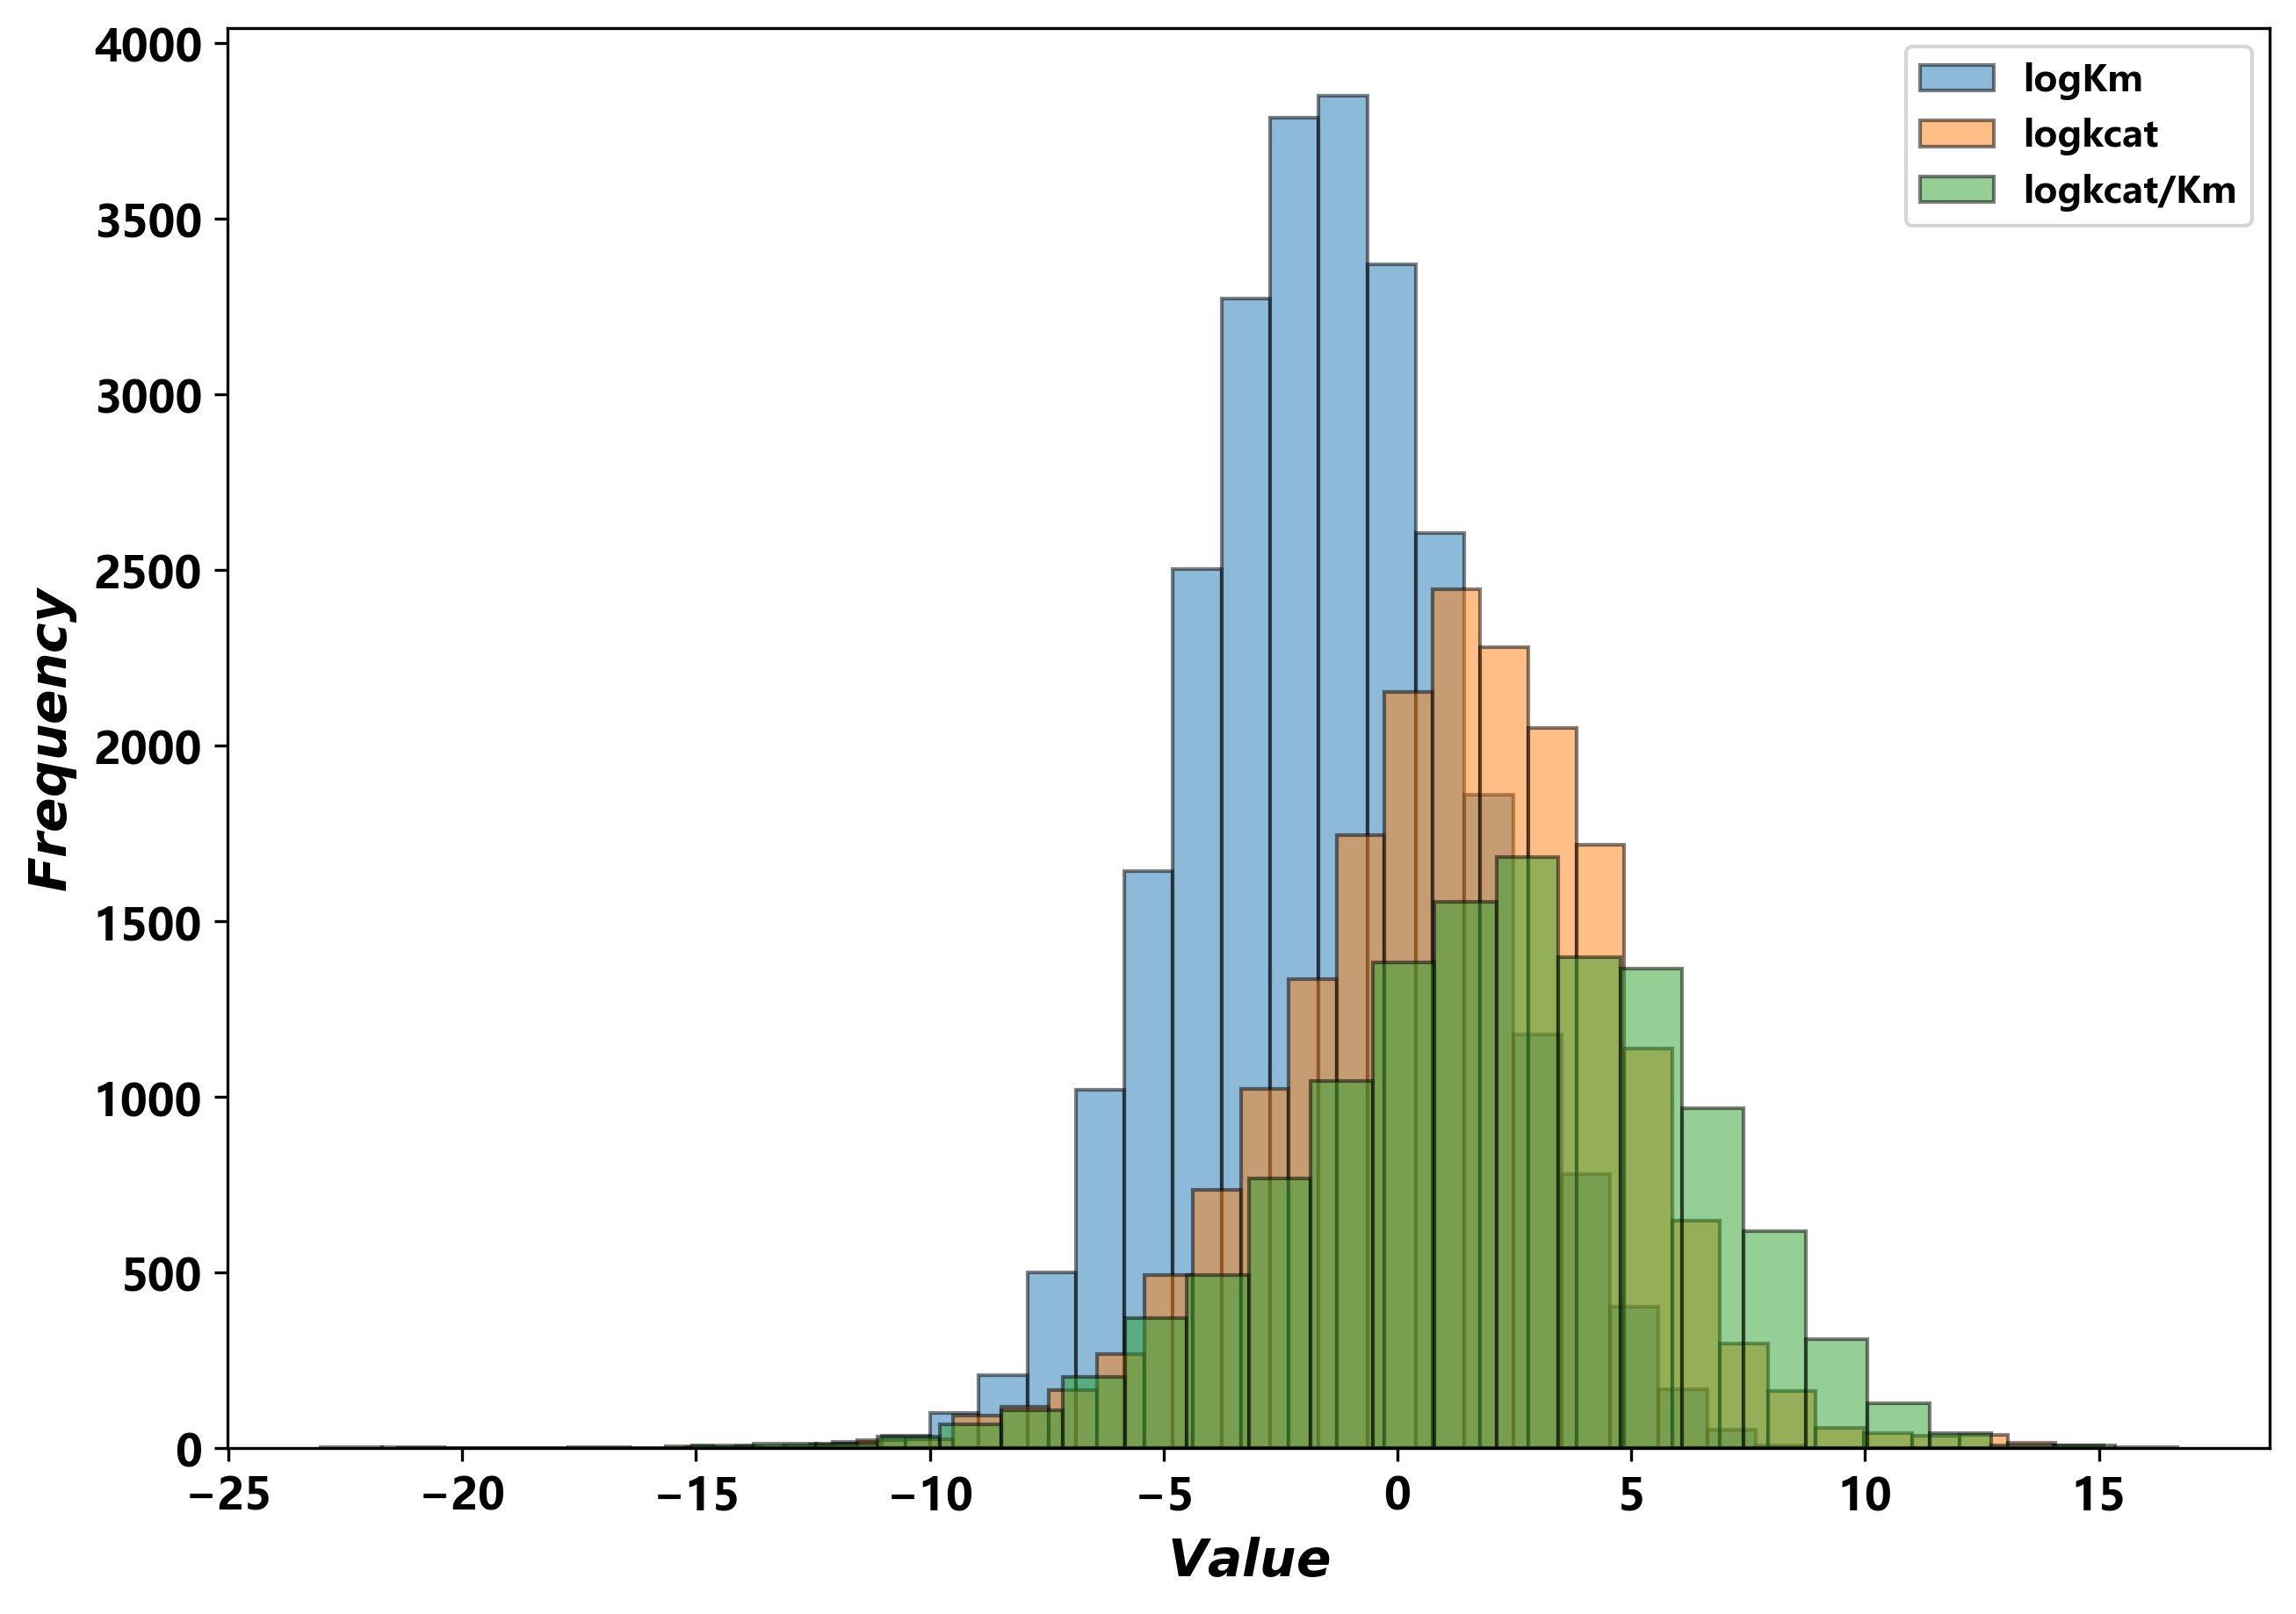

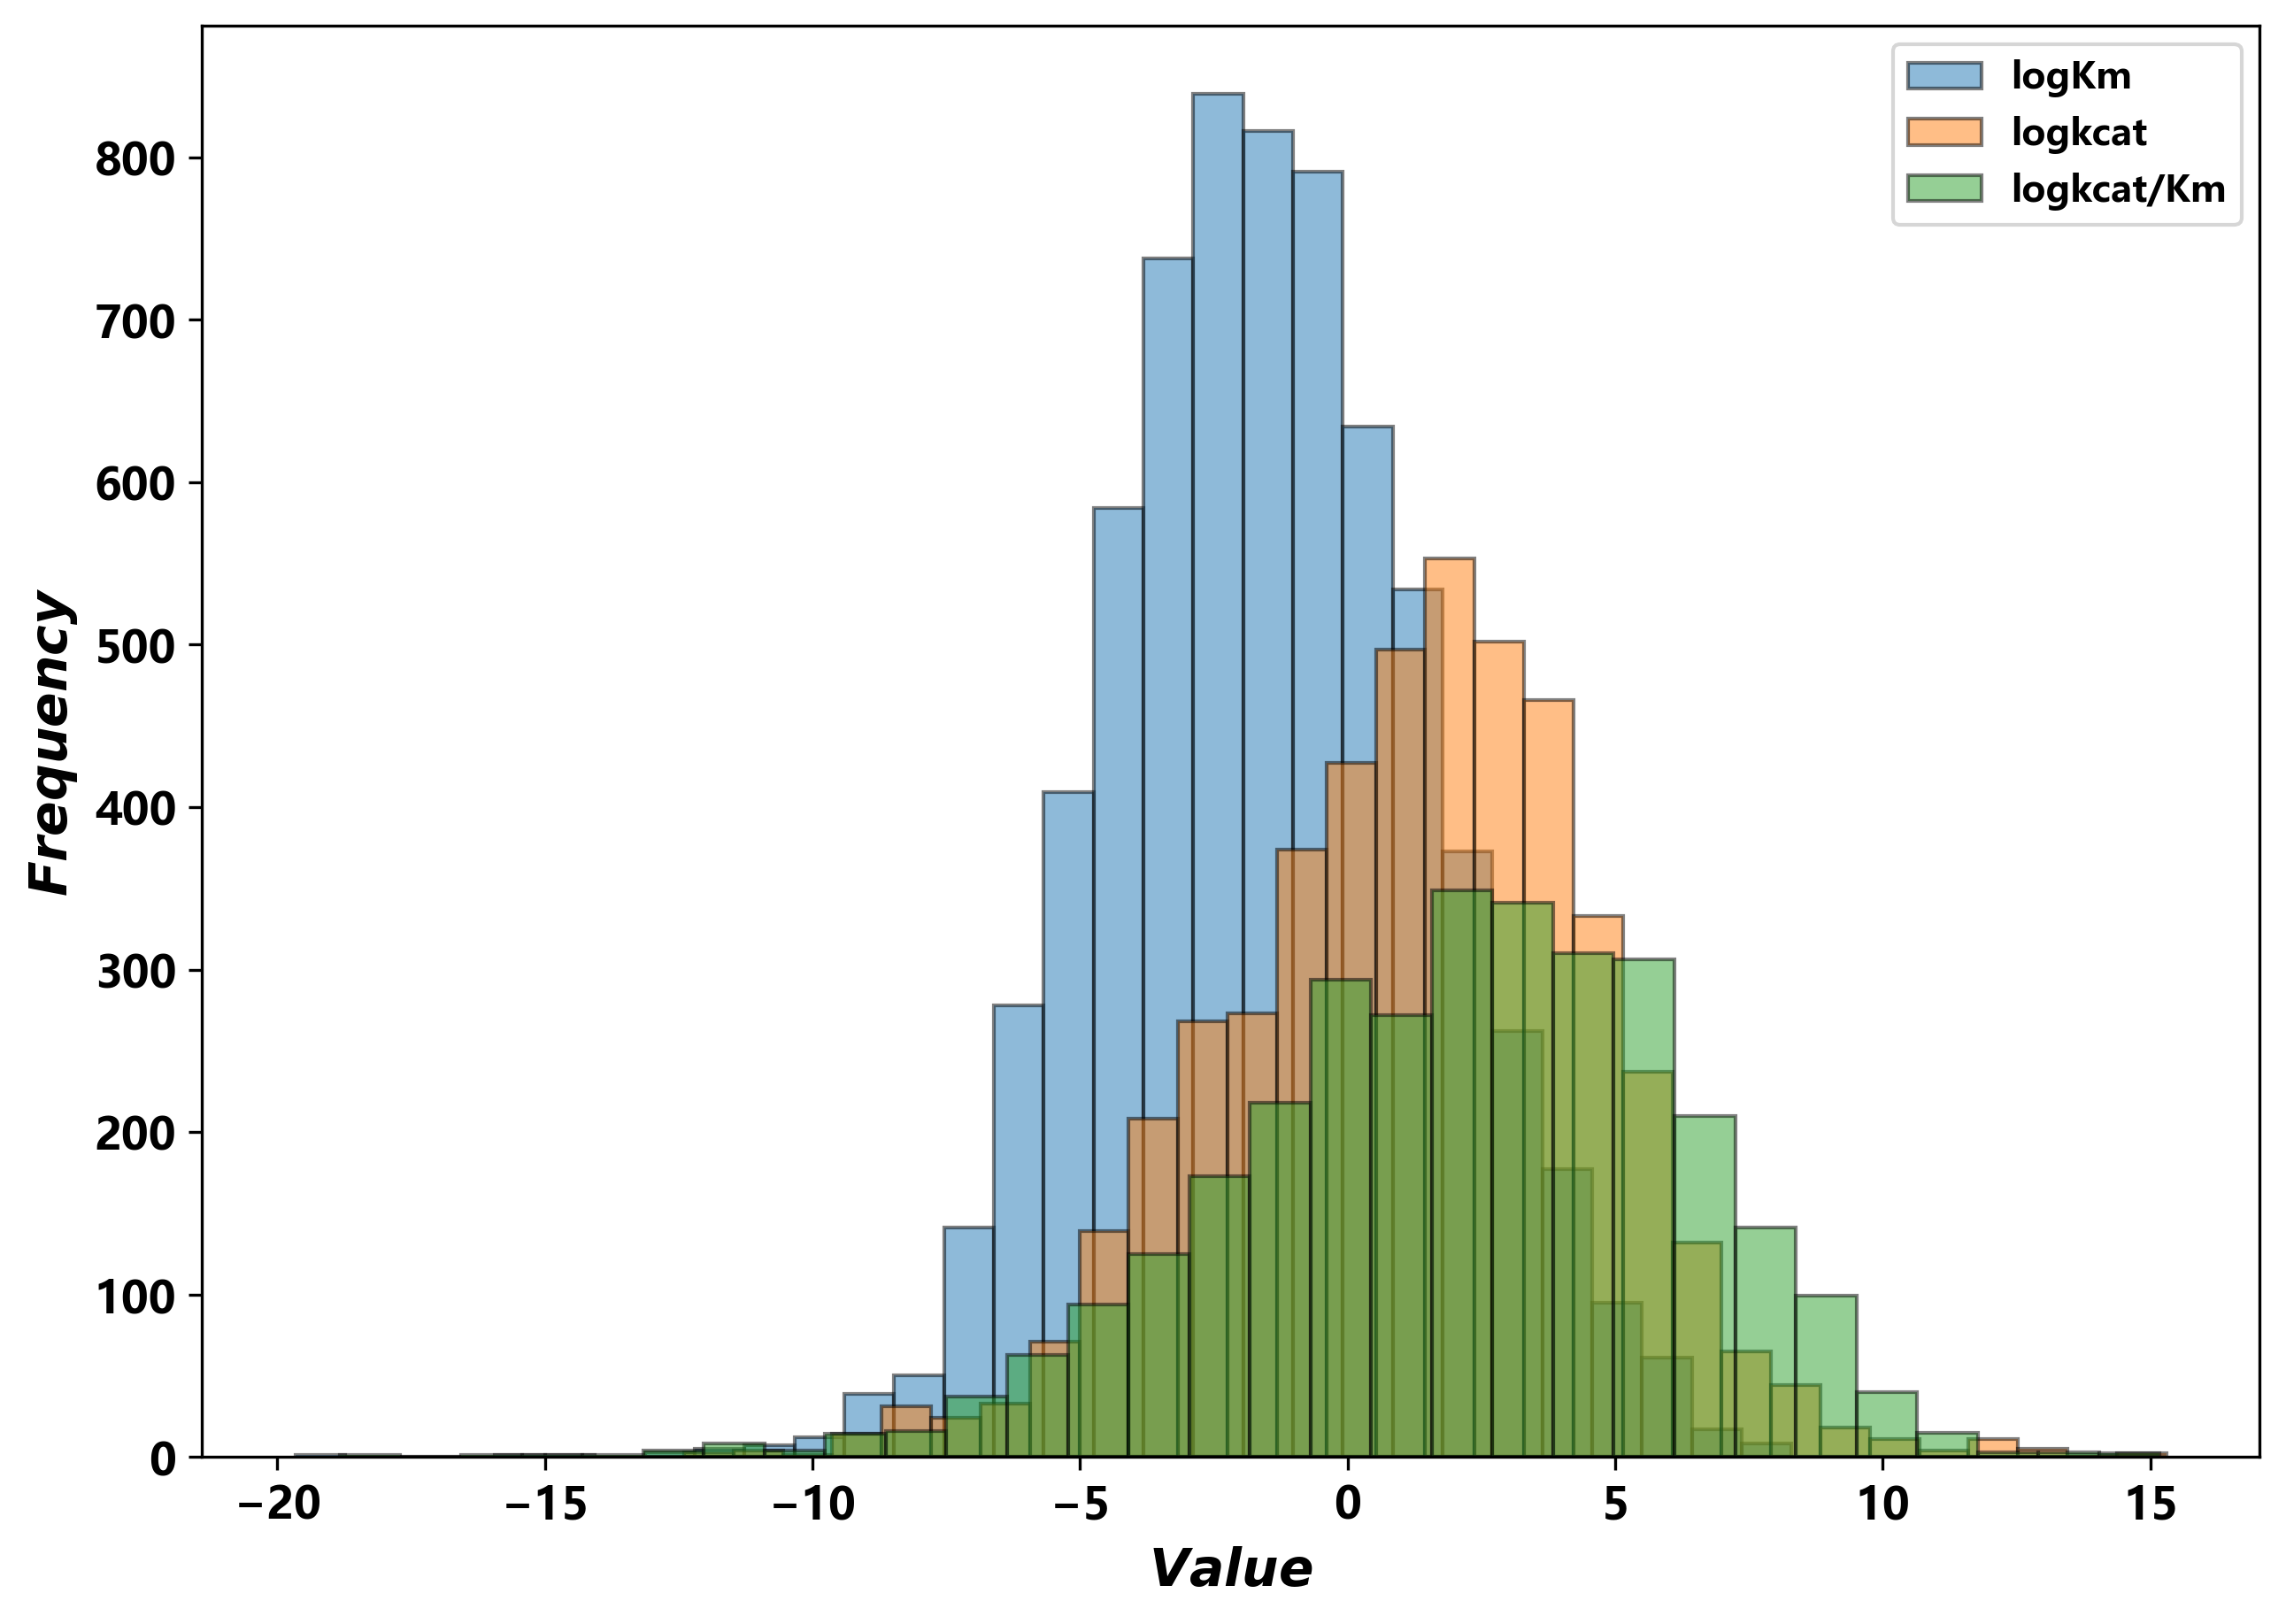

Fold 3: Train set length = 29782, Validation set length = 7445


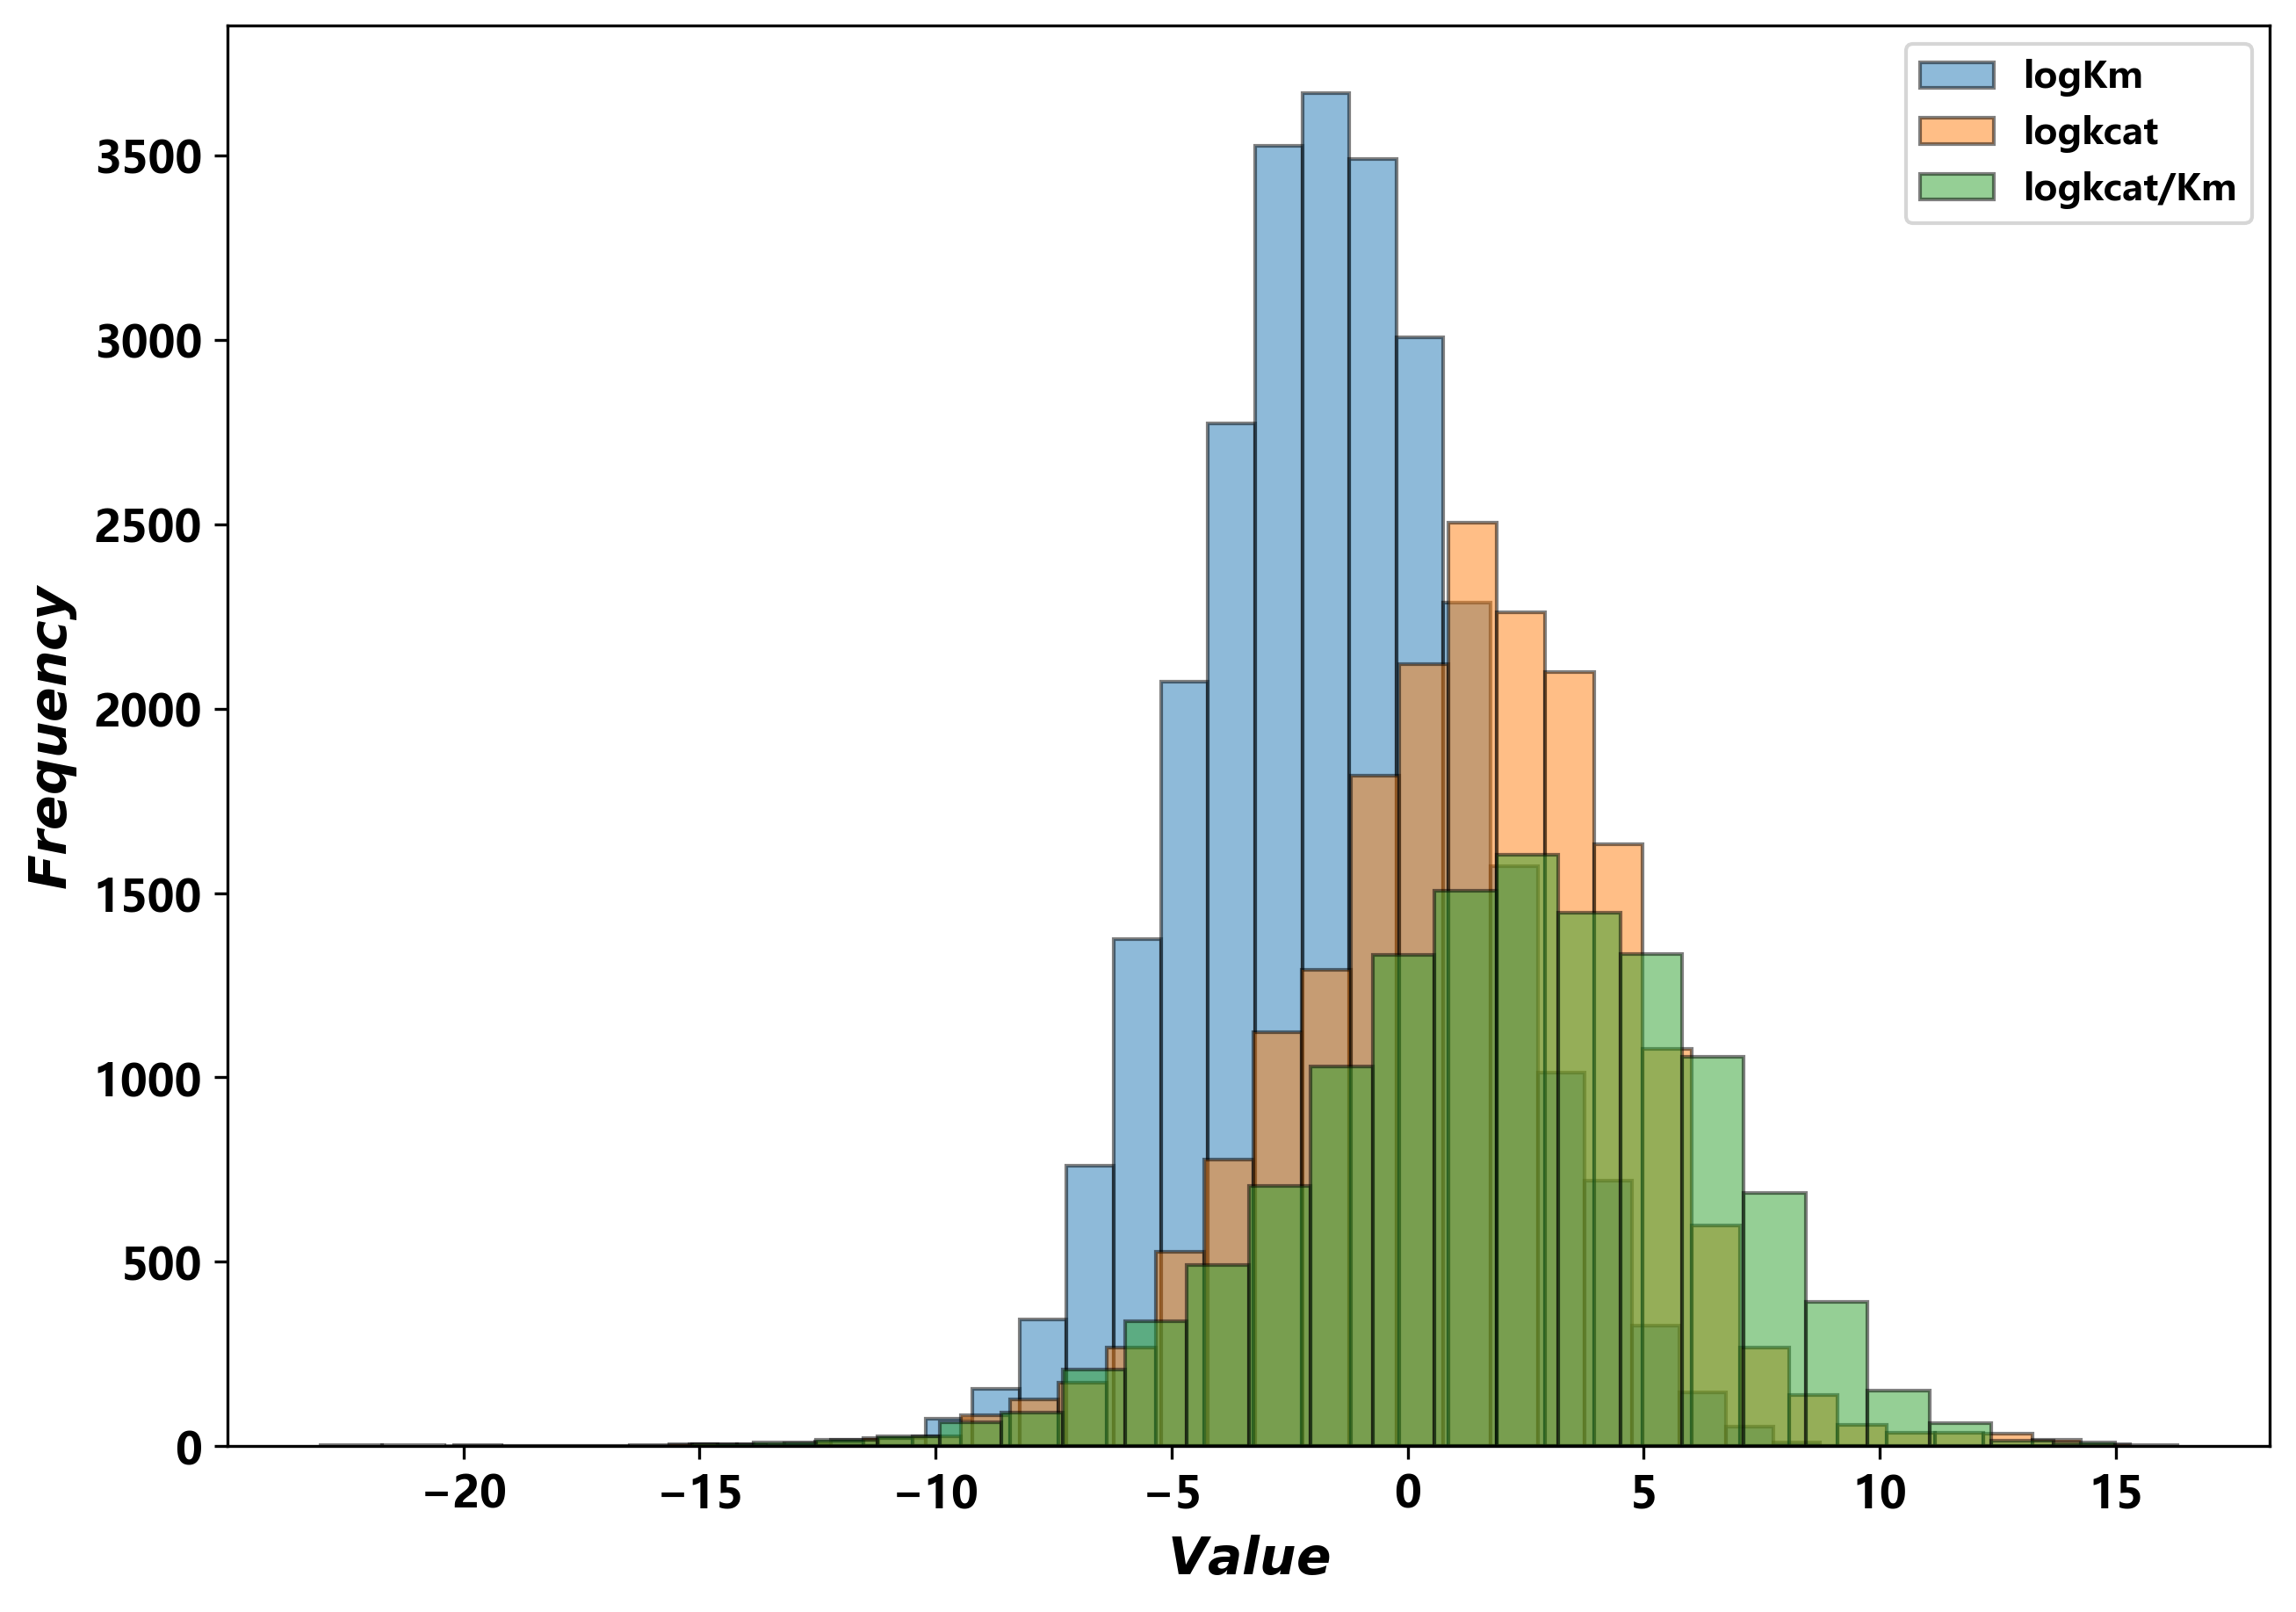

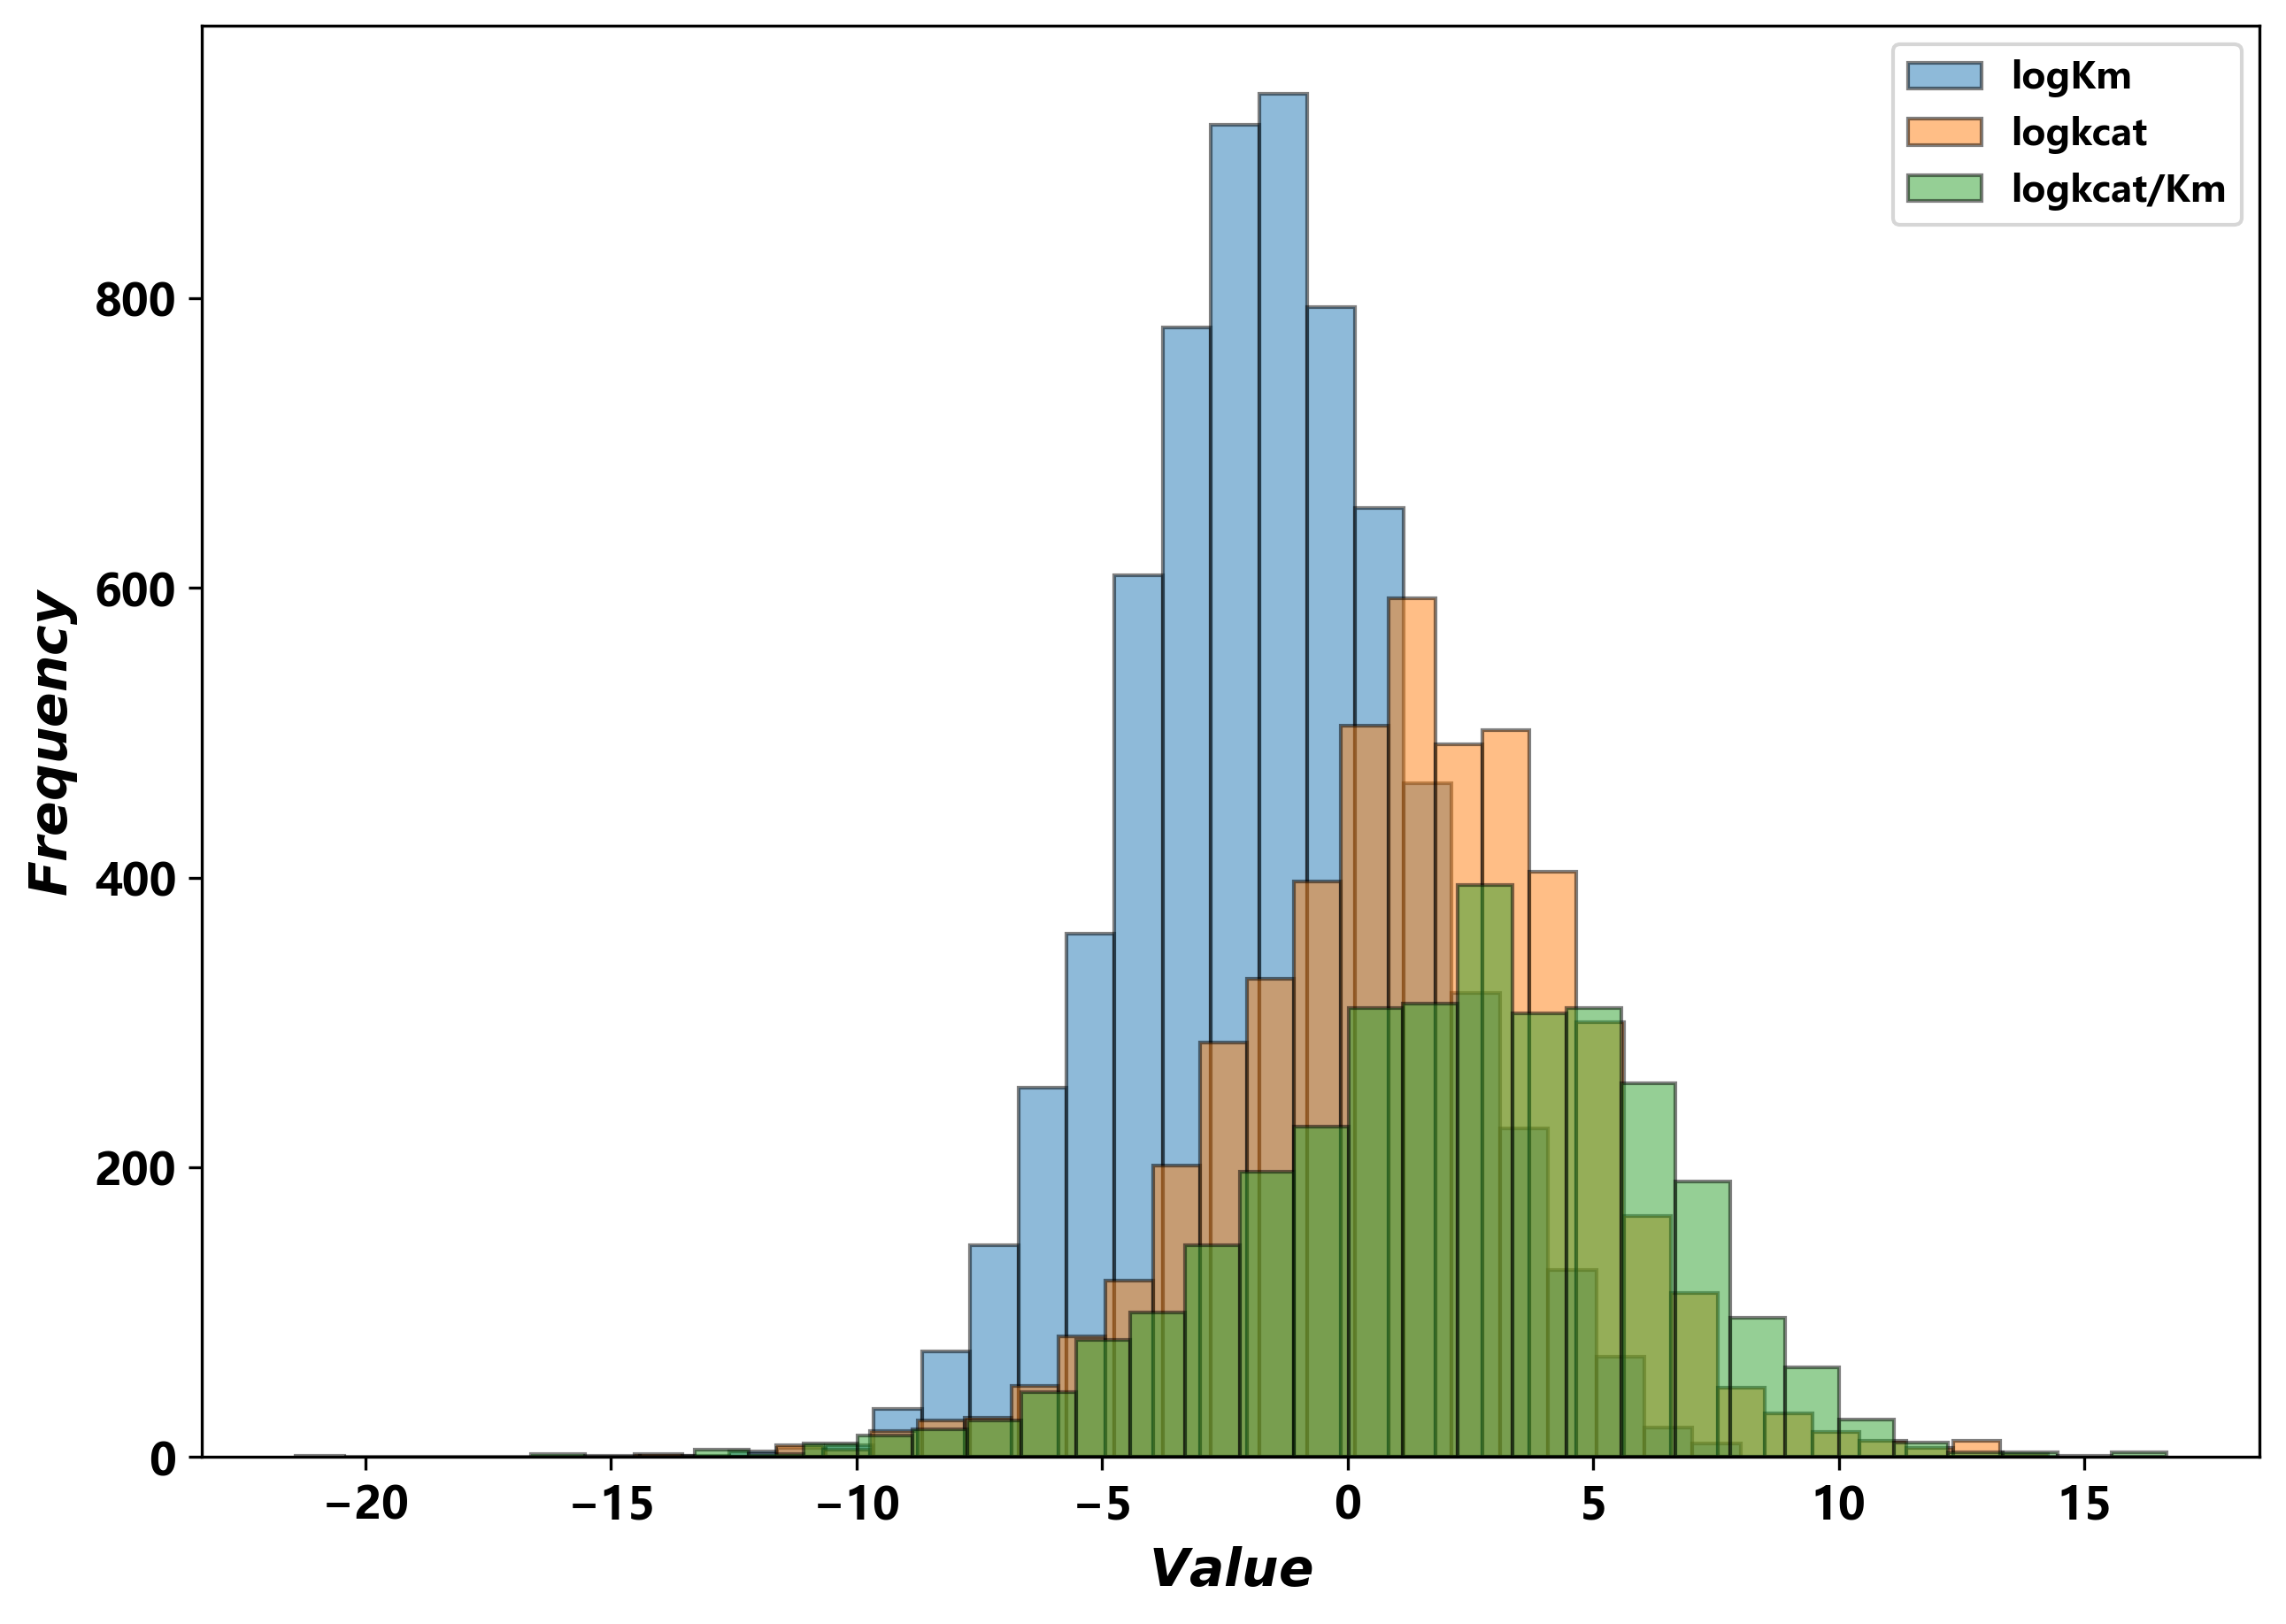

Fold 4: Train set length = 29782, Validation set length = 7445


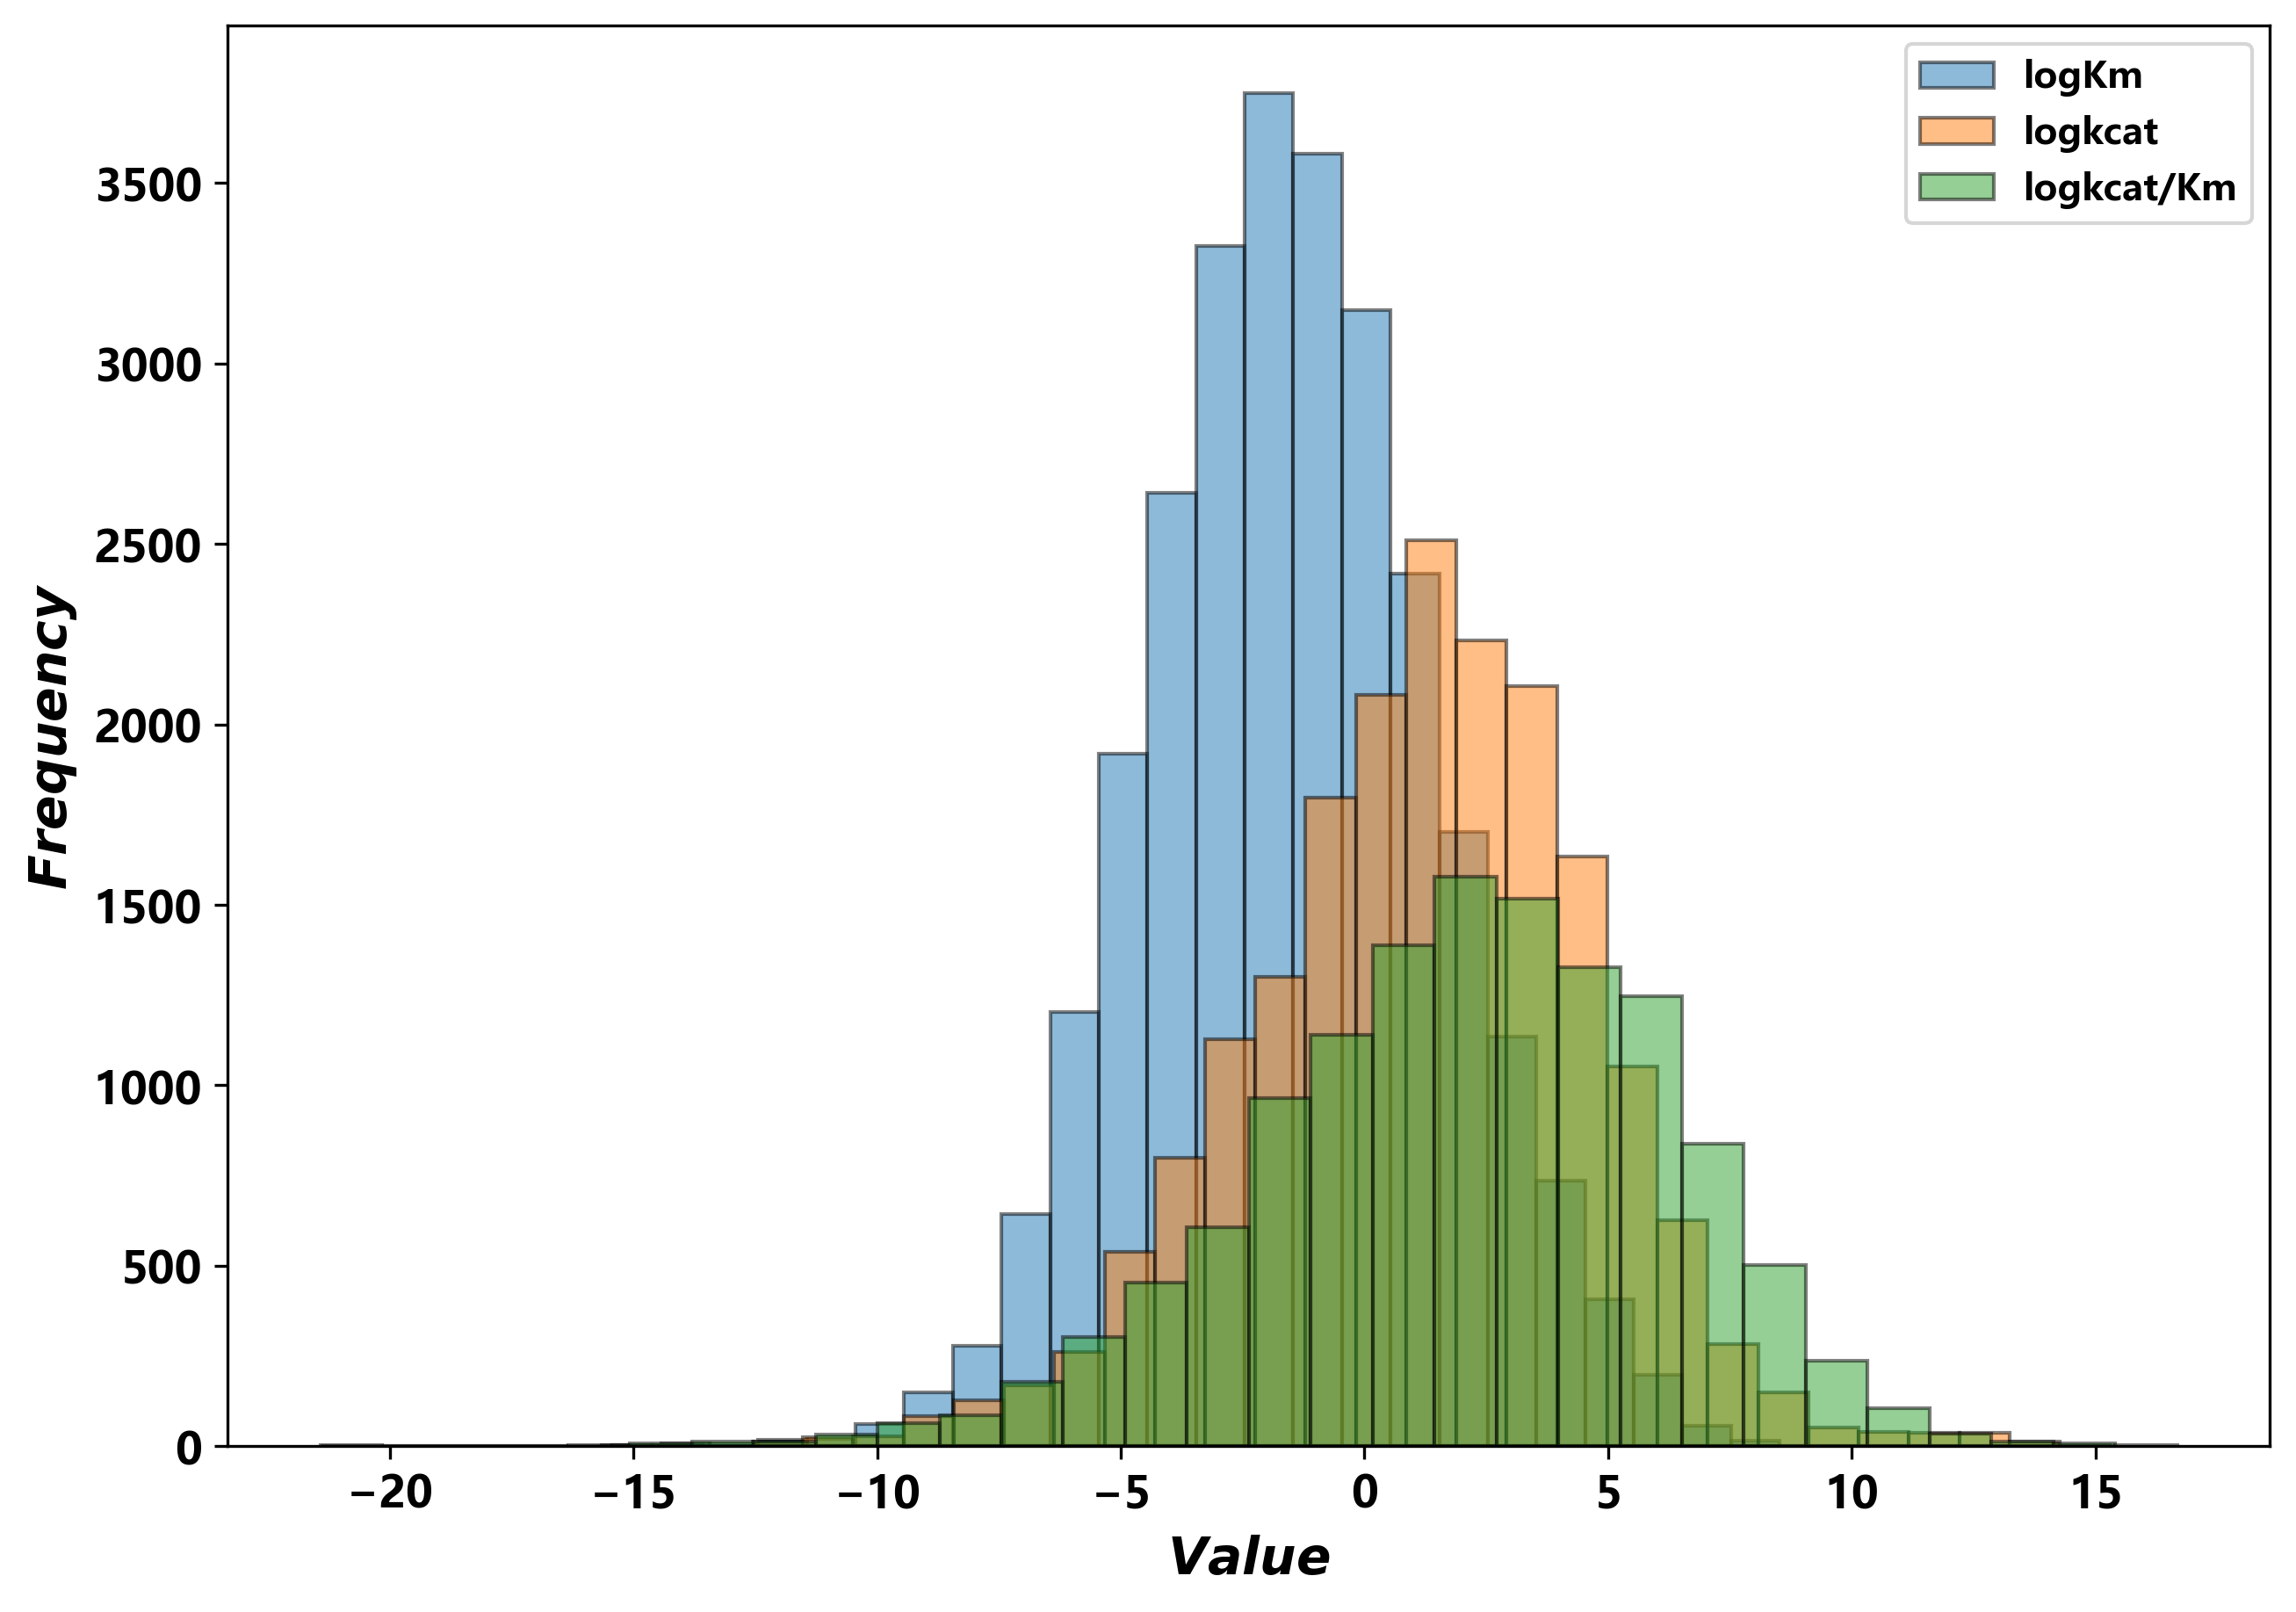

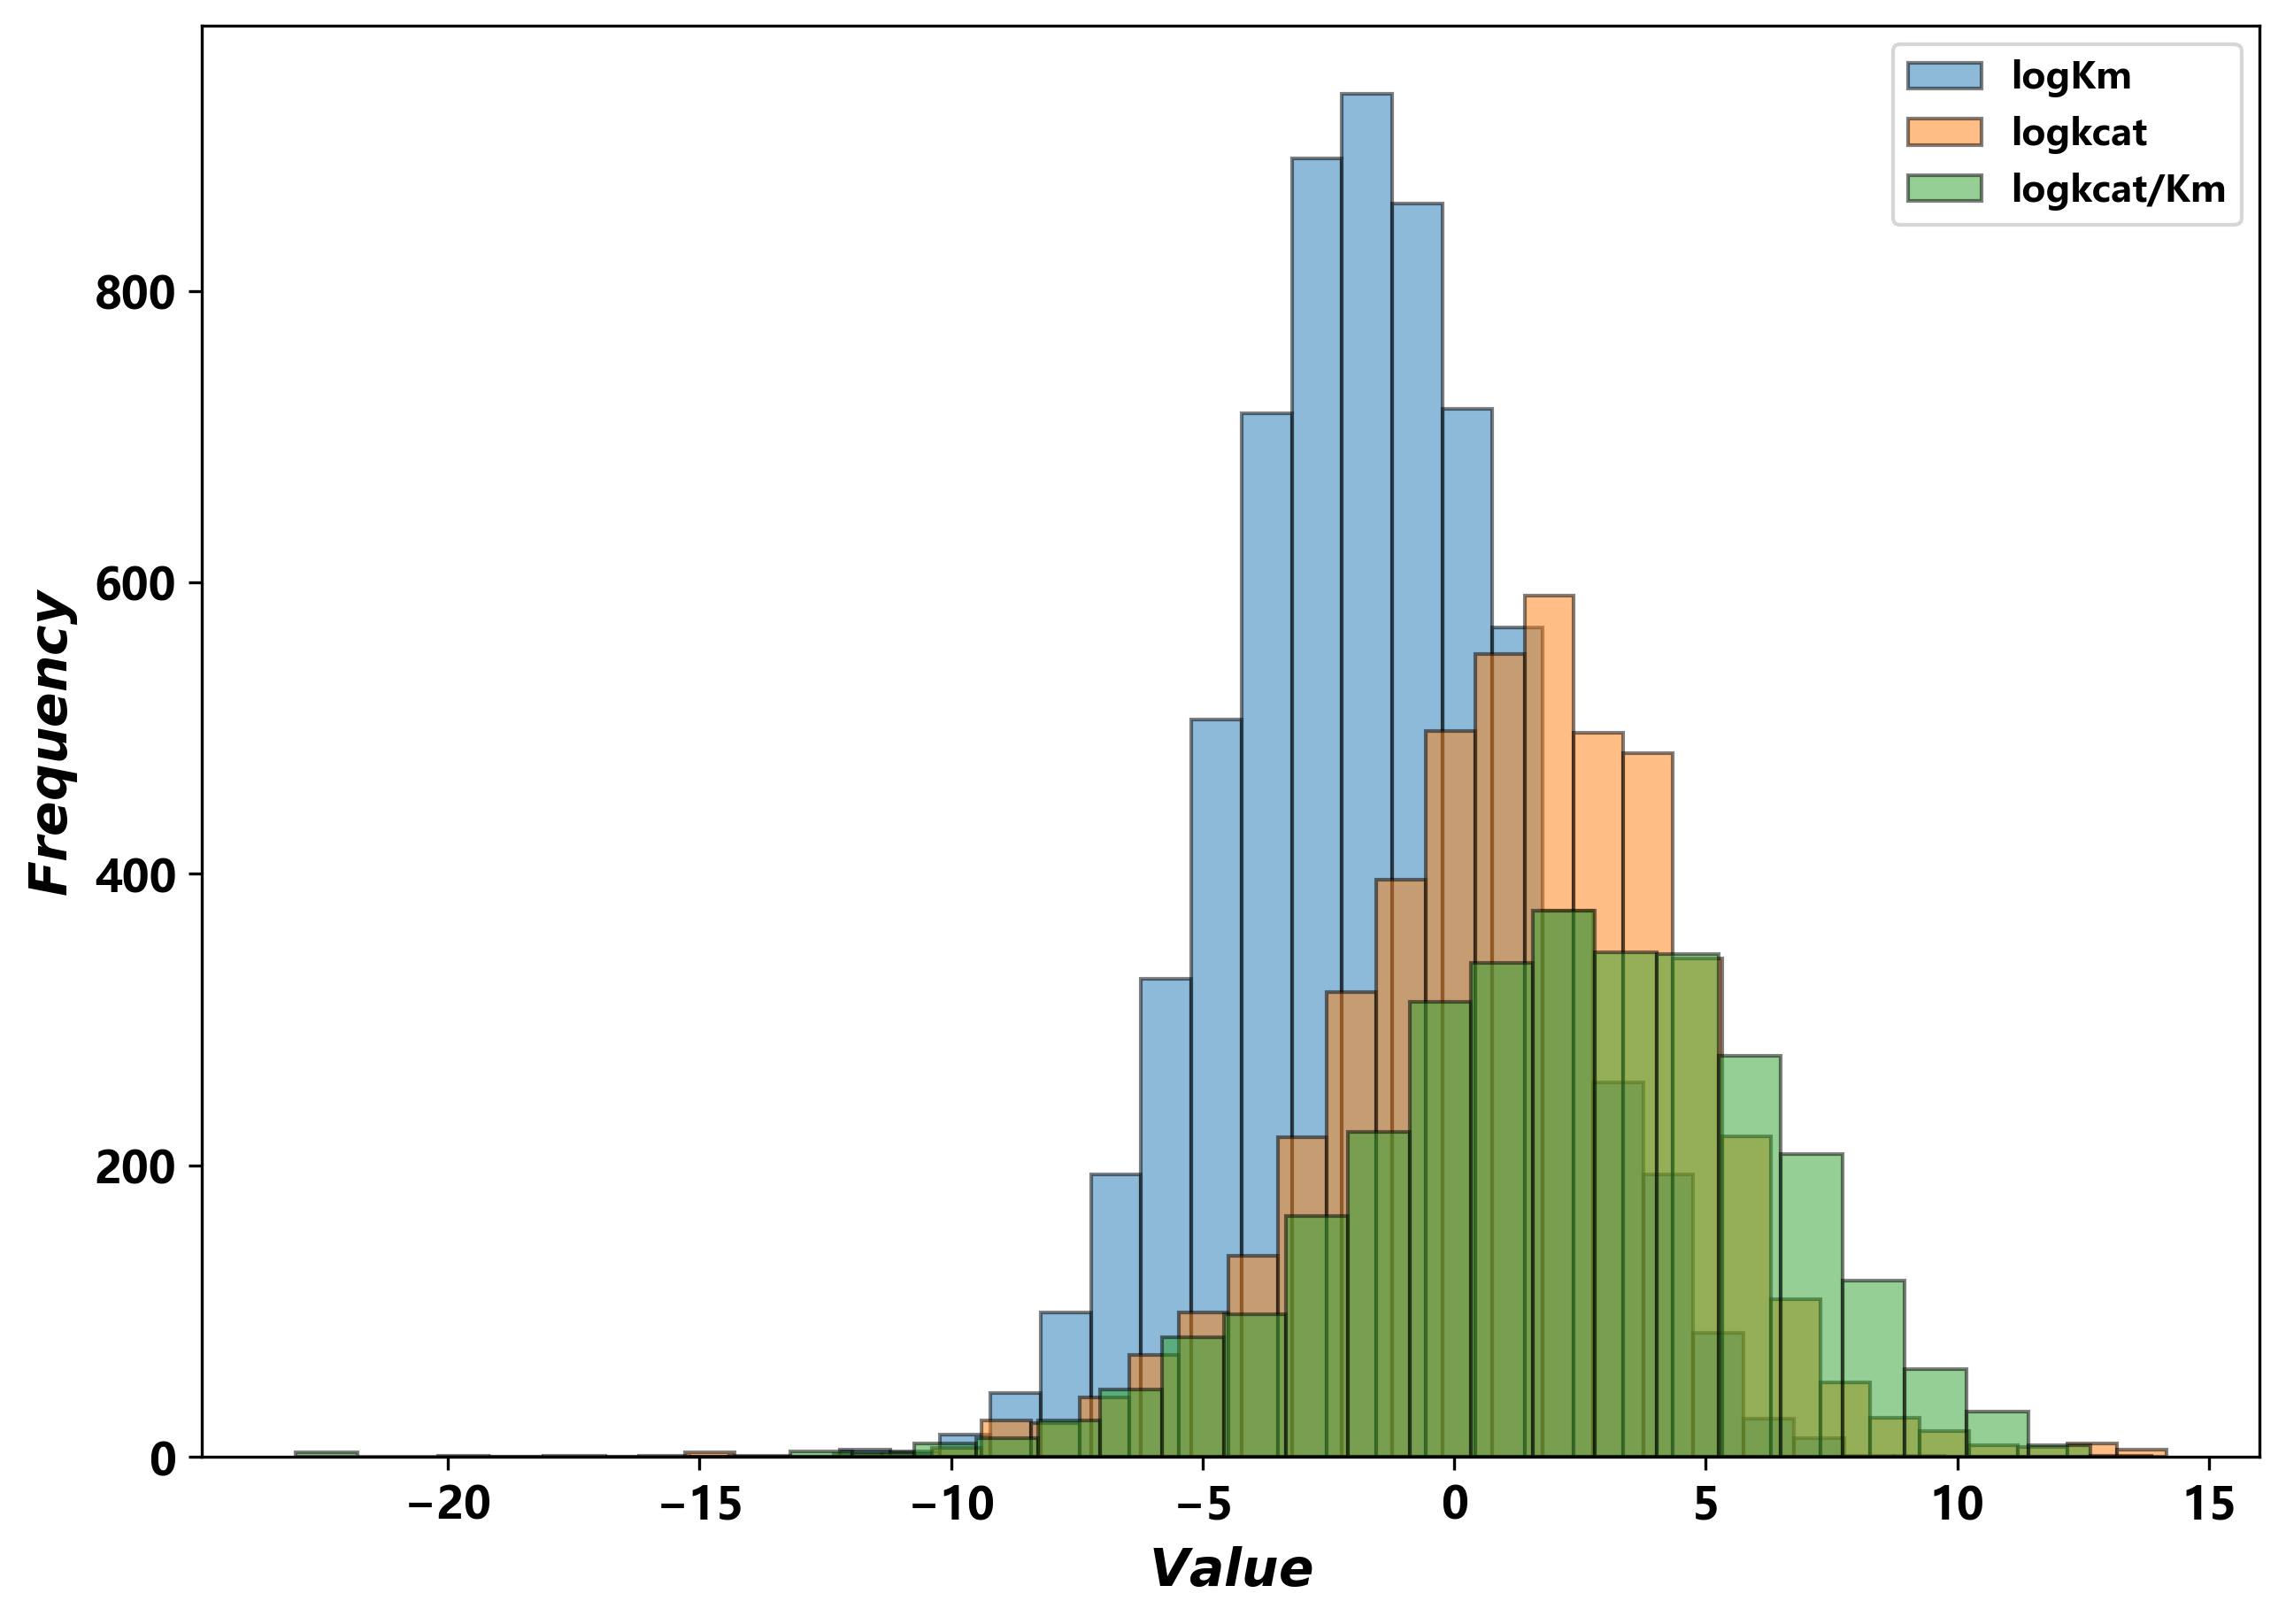

Fold 5: Train set length = 29782, Validation set length = 7445


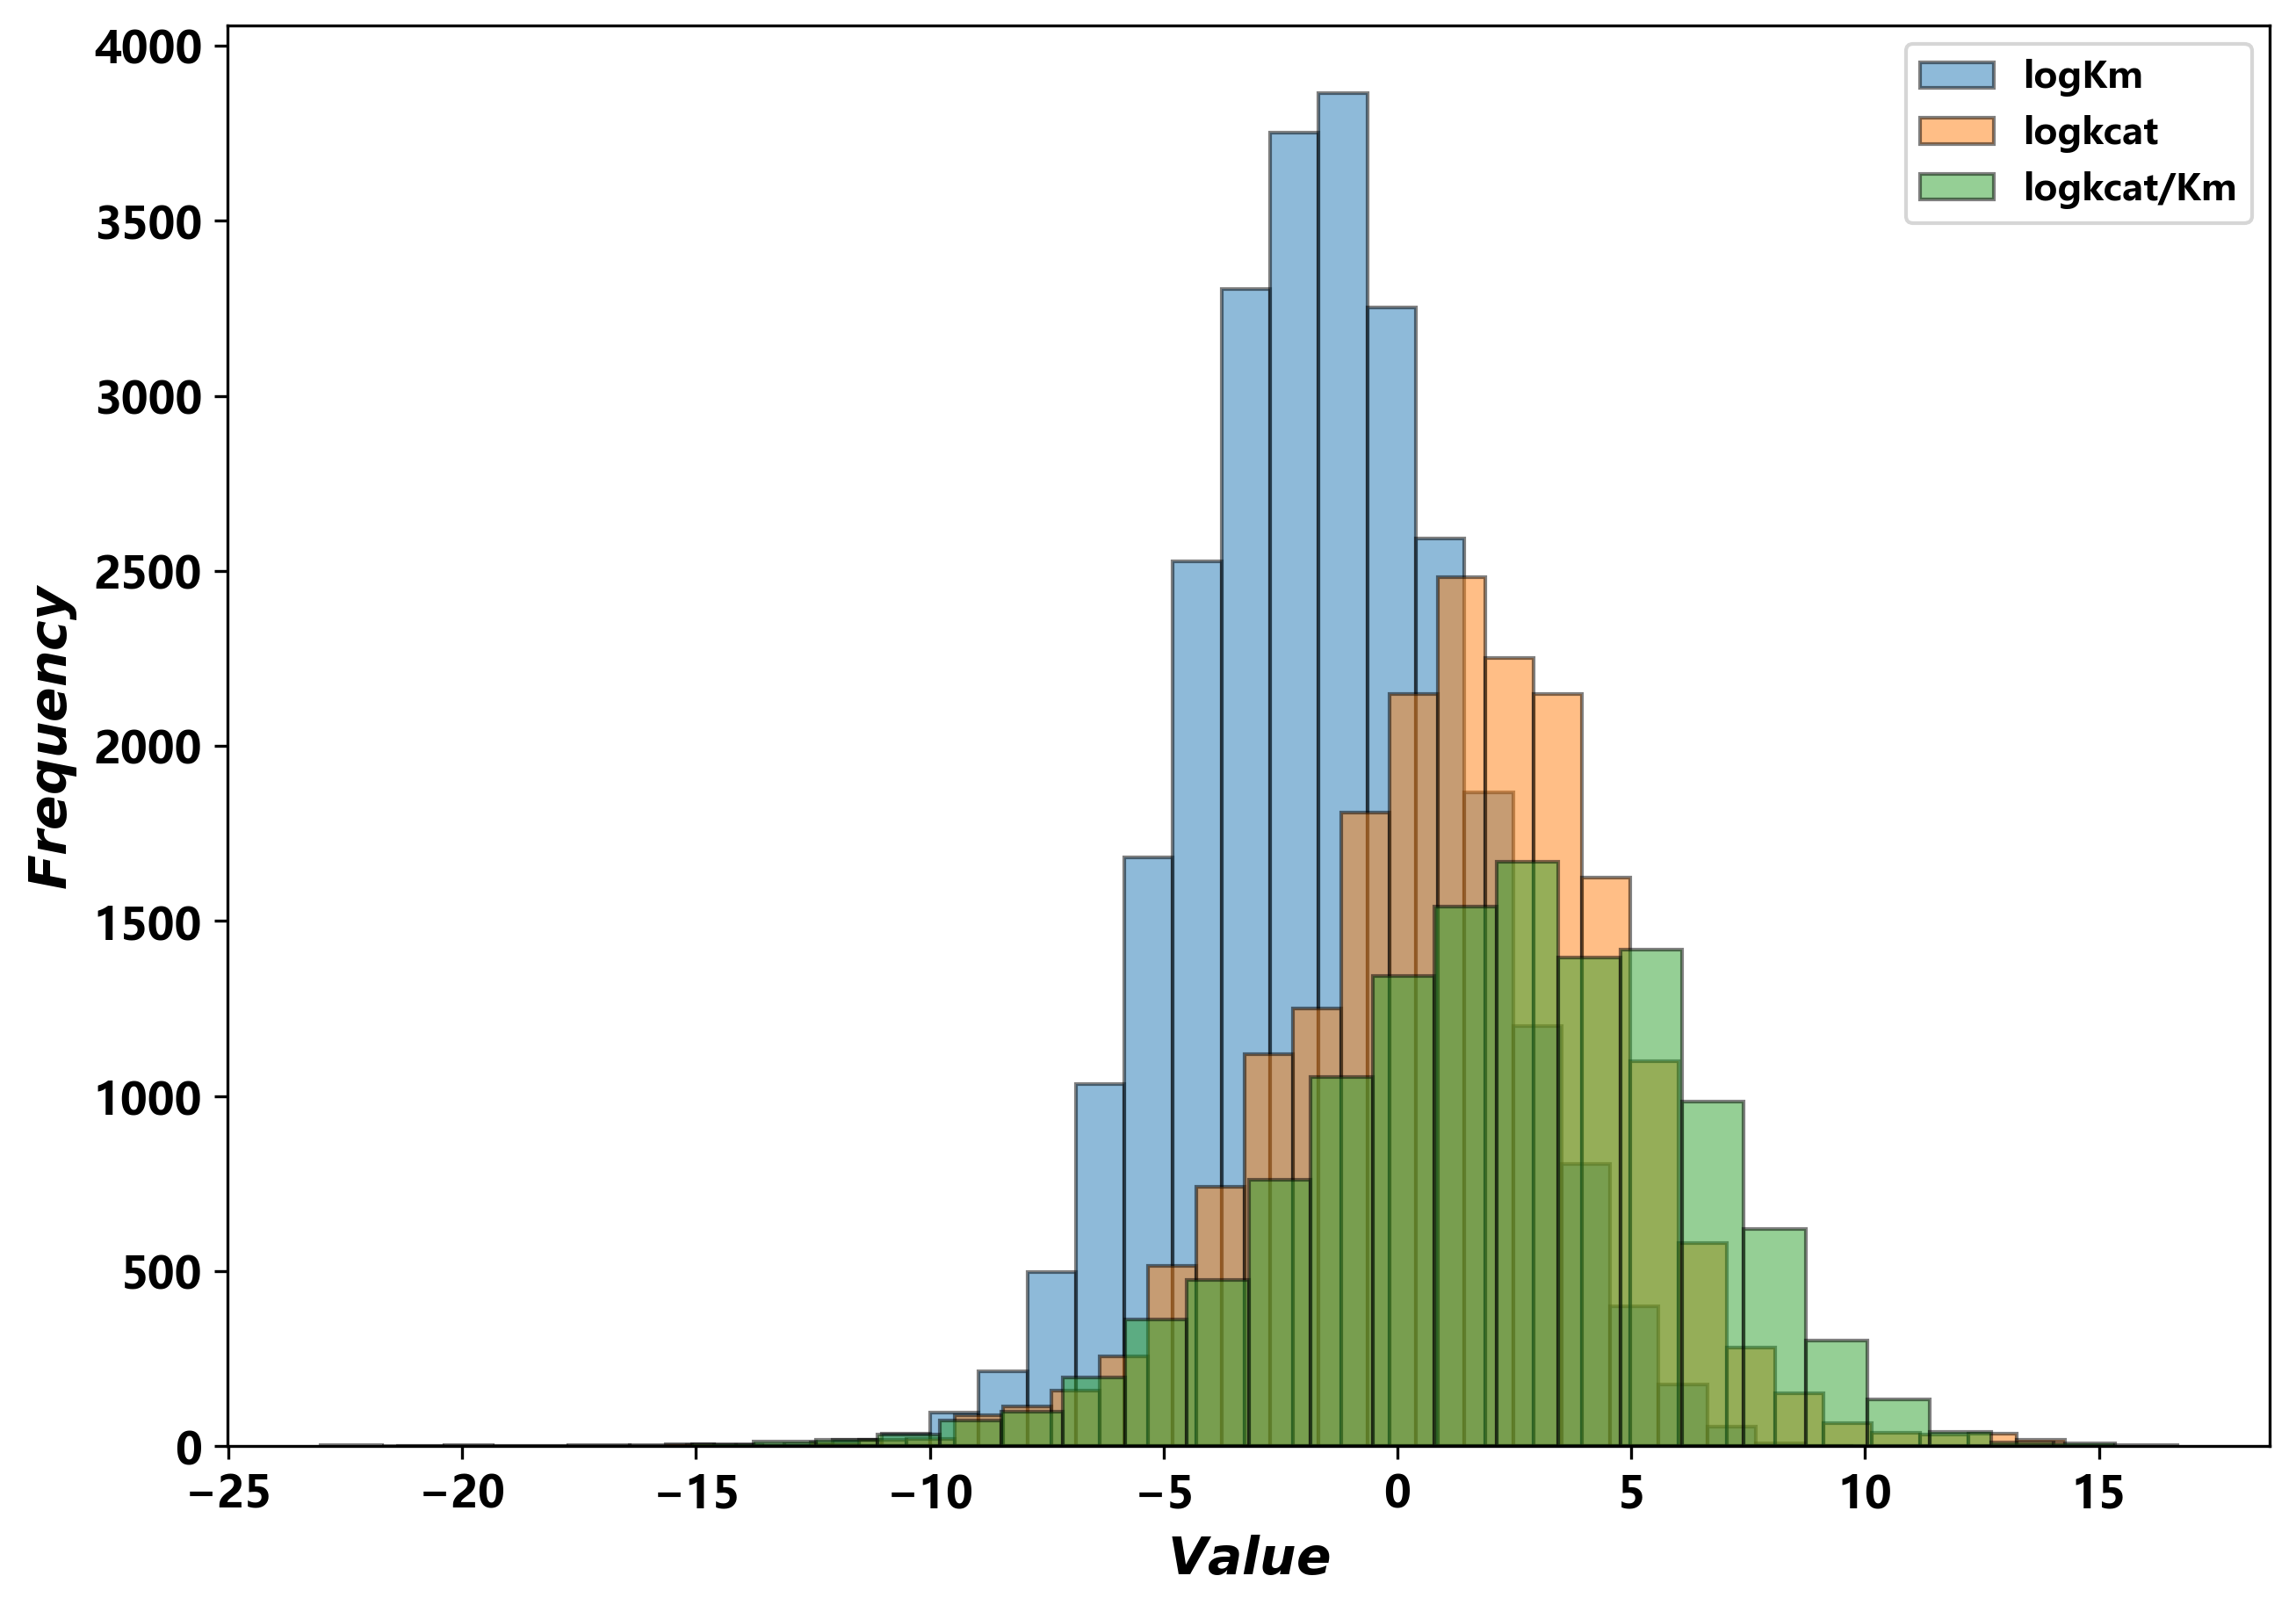

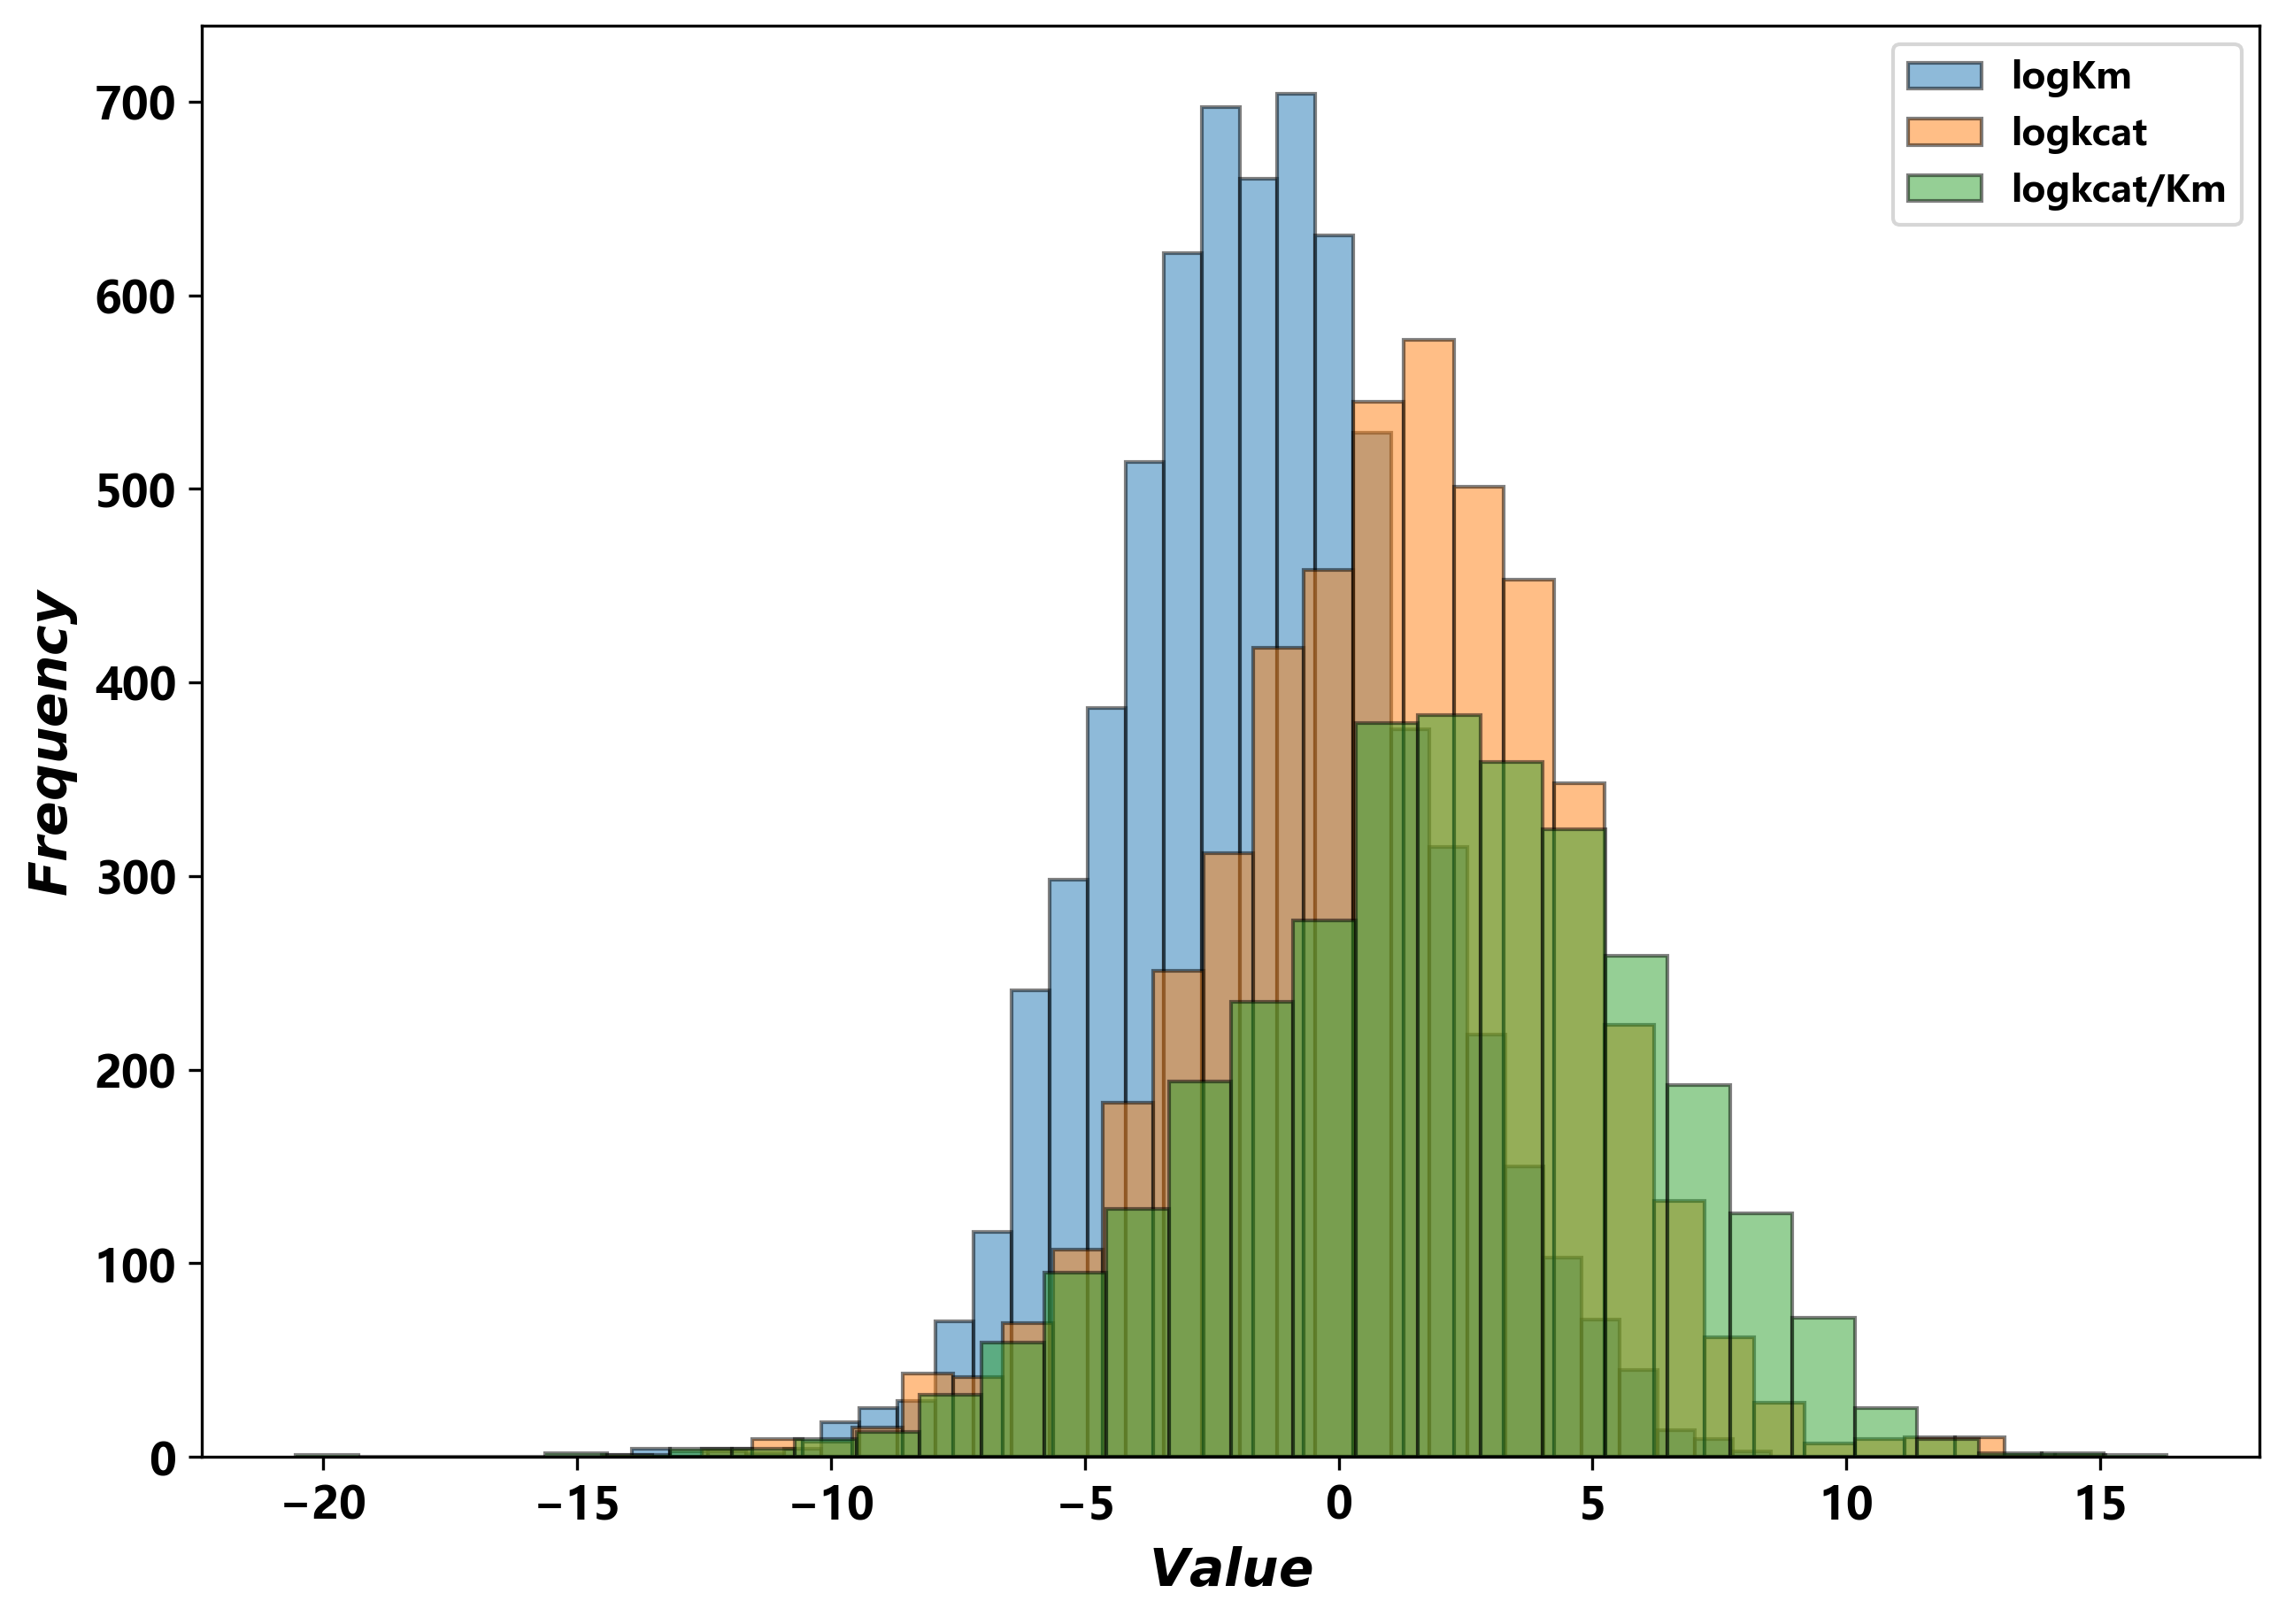

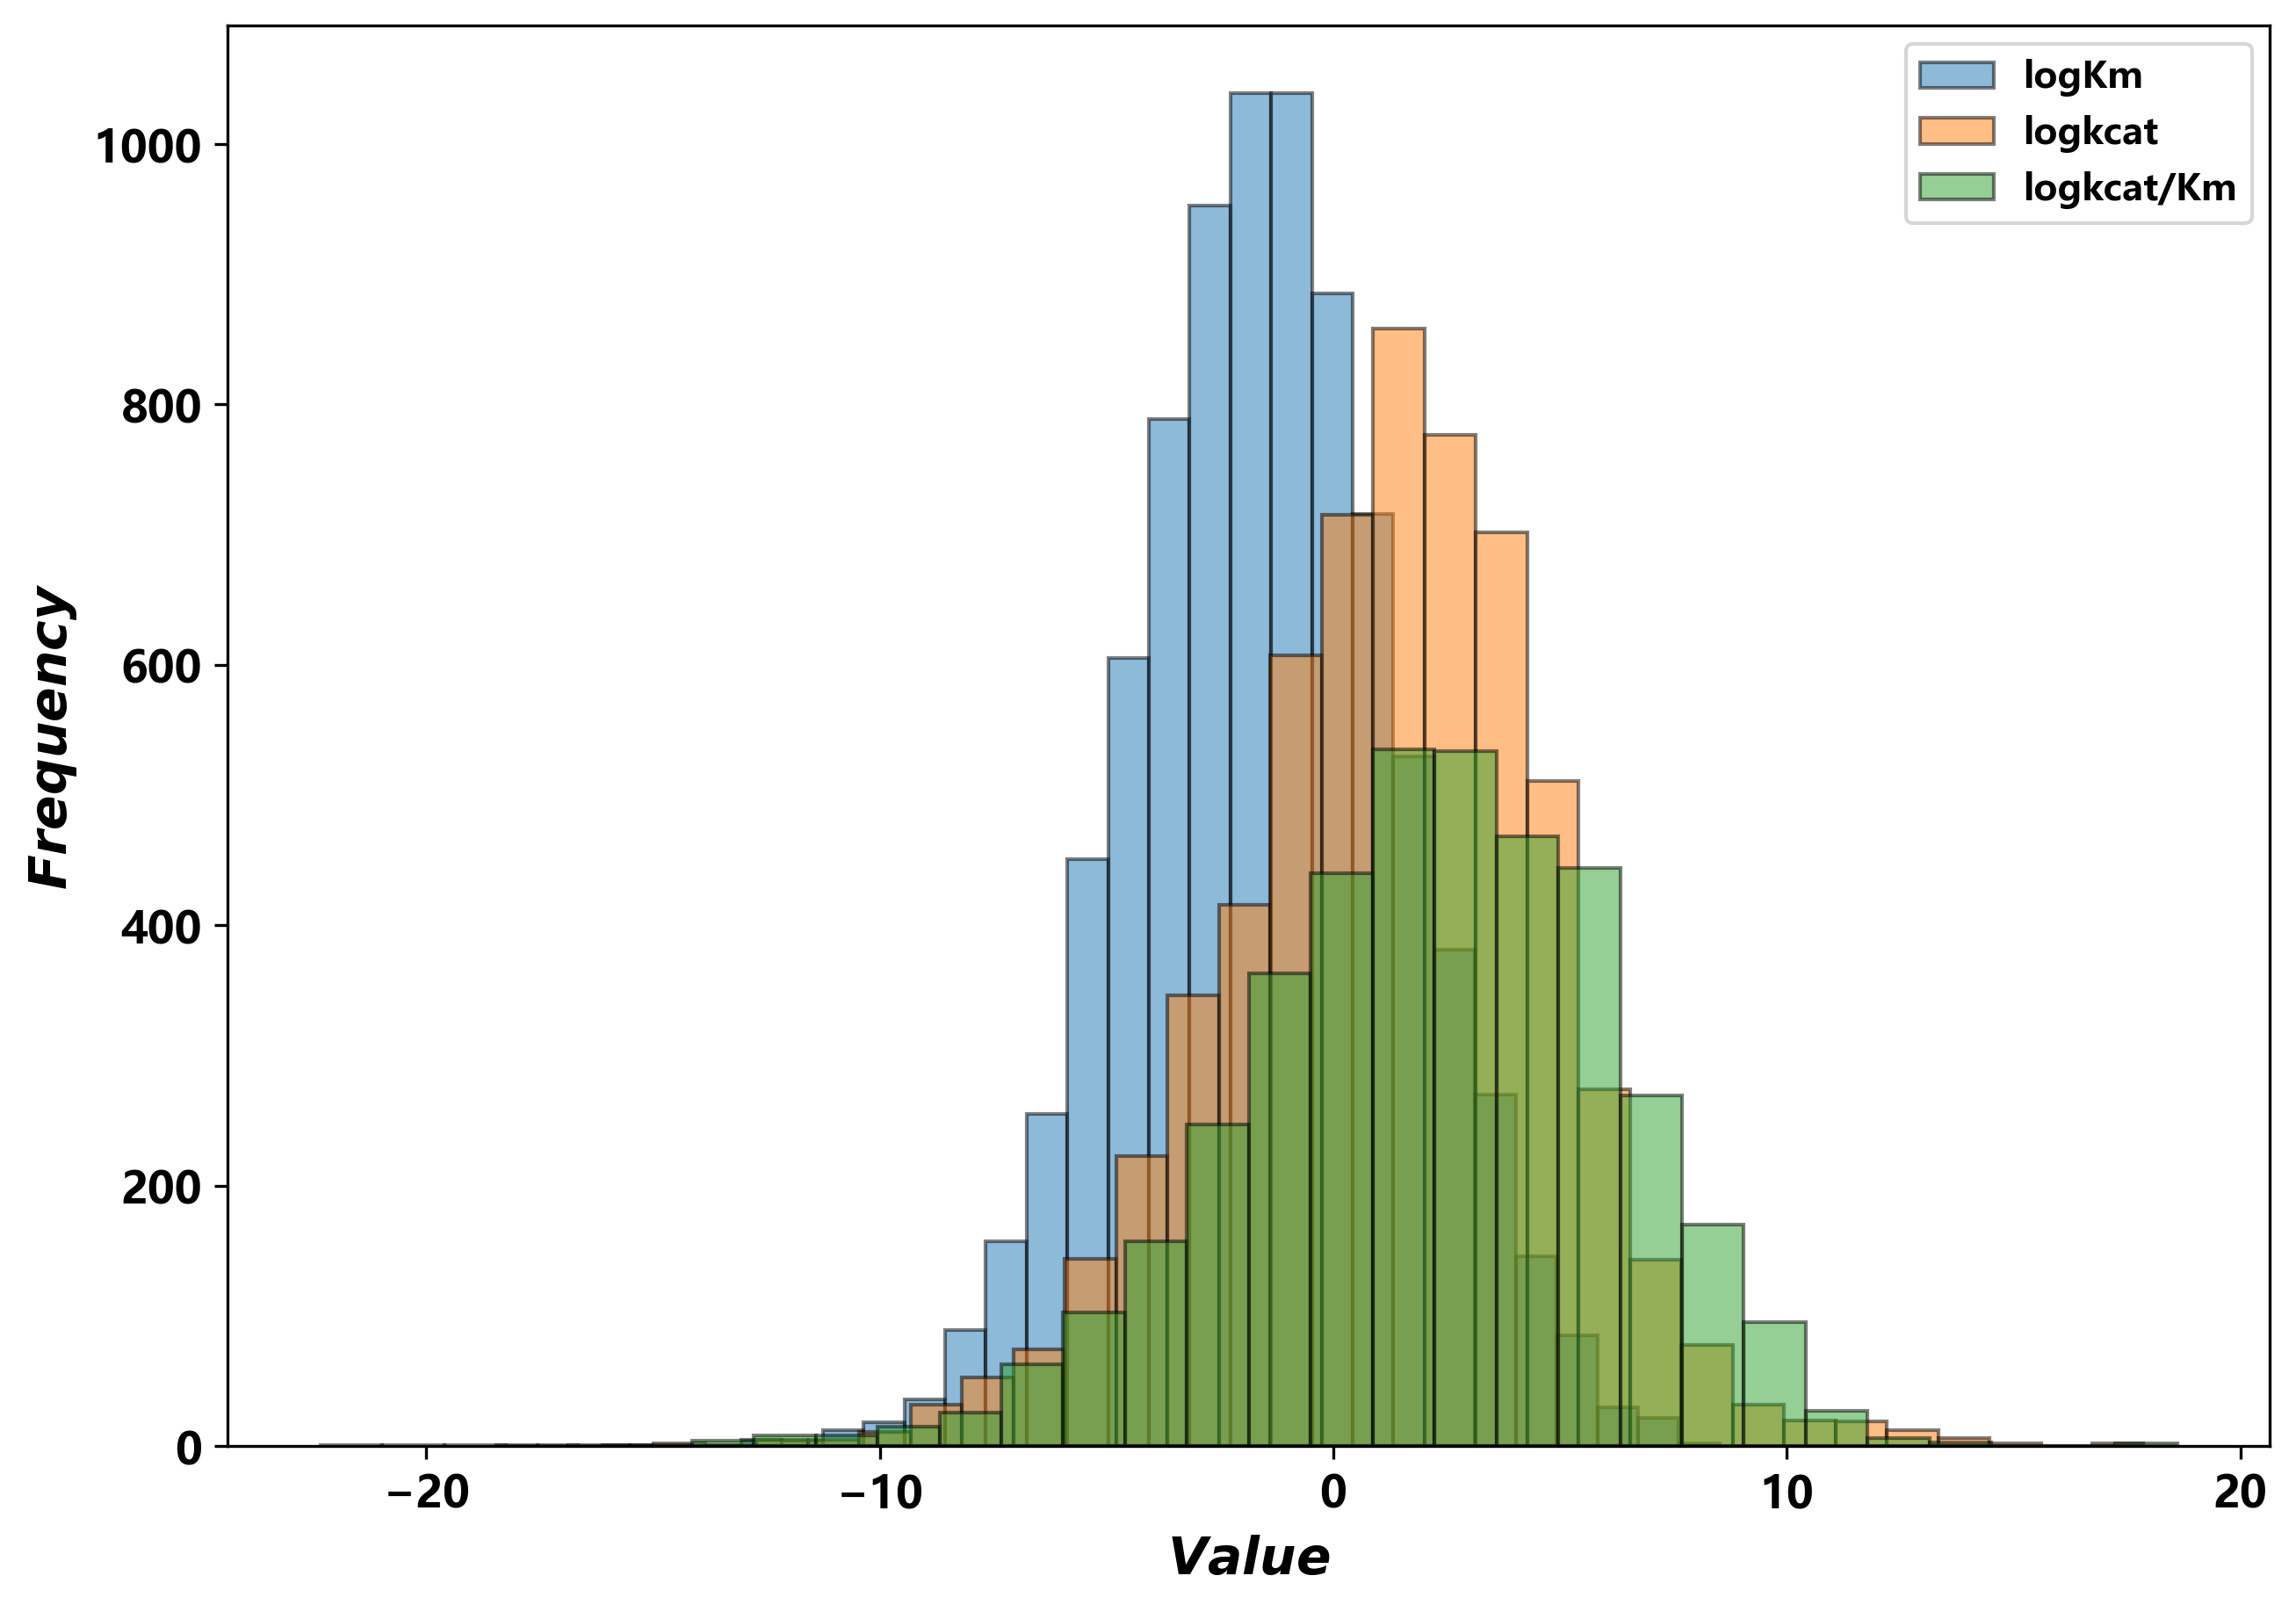

In [8]:
from sklearn.model_selection import train_test_split, KFold

columns_to_plot = ['logkm', 'logkcat', 'logkcatkm']
test_size = 0.2
random_state = 66

df_train_val, df_test = train_test_split(df_all_log_transformed, test_size=test_size, random_state=random_state)
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

for fold, (train_index, val_index) in enumerate(kf.split(df_train_val), start=1):
    df_train = df_train_val.iloc[train_index]
    df_val = df_train_val.iloc[val_index]
    print(f"Fold {fold}: Train set length = {len(df_train)}, Validation set length = {len(df_val)}")

    # 绘制第fold折训练集直方图
    plot_histograms(df_train, columns_to_plot, f"Fold {fold} Train Set", f"./figures/fold_{fold}_train_set_distribution.png")
    # 绘制第fold折验证集直方图
    plot_histograms(df_val, columns_to_plot, f"Fold {fold} Validation Set", f"./figures/fold_{fold}_validation_set_distribution.png")

# 绘制测试集直方图
plot_histograms(df_test, columns_to_plot, "Test Set", "./figures/test_set_distribution.png")

# Standardize

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import pickle
scaler_dict = {}
df_all_log_transformed = pd.read_pickle('./dataset/df_all_log_transformed.pkl')

df_standardized = df_all_log_transformed.copy()[['prott5', 'molebert', 'ph', 't', 'logp', 'mw', 'logkm', 'logkcat', 'logkcatkm']]
for col in df_standardized.drop(columns=['logkcatkm', 'logkcat', 'logkm']).columns:
    # float int None
    if pd.api.types.is_numeric_dtype(df_standardized[col]) or df_standardized[col].isnull().any():
        # mask
        mask = df_standardized[col].isnull()

        # no none
        scaler = StandardScaler()
        non_null_data = df_standardized[col][~mask].values.reshape(-1, 1)
        standardized_non_null = scaler.fit_transform(non_null_data)

        # 生成标准化列，保留 None 值
        standardized_col = df_standardized[col].copy()
        standardized_col[~mask] = standardized_non_null.flatten()
        df_standardized[col] = standardized_col
        scaler_dict[col] = scaler

    # list or numpy
    elif isinstance(df_standardized[col].iloc[0], (list, np.ndarray)):
        all_data = np.array(df_standardized[col].tolist())  # to numpy
        if all_data.ndim == 1:  # one dimension
            scaler = StandardScaler()
            standardized_data = scaler.fit_transform(all_data.reshape(-1, 1))
            df_standardized[col] = standardized_data.flatten().tolist()
        else:  # multi dimension
            scaler = StandardScaler()
            standardized_data = scaler.fit_transform(all_data)
            df_standardized[col] = standardized_data.tolist()
        scaler_dict[col] = scaler

    else:
        print(f'Skip column {col} (non-numeric or unsupported type)')

# 保存 scaler_dict 到文件中
with open('./dataset/data_scaler_dict.pkl', 'wb') as f:
    pickle.dump(scaler_dict, f)

print('Data after standardization:')
df_standardized.to_pickle('./dataset/df_standardized.pkl')
df_standardized.head(30)

Data after standardization:


,prott5,molebert,ph,t,logp,mw,logkm,logkcat,logkcatkm
0,"[0.9836773122177332, -0.6785152738252579, 0.36...","[0.01560989479837584, -1.3349135837719275, 0.2...",0.030801,2.826797,0.954962,-0.754389,-21.416413,-4.605170,NaN
1,"[-0.8897688384886369, -0.3479069347346778, 0.7...","[0.7284745175250082, 2.0498582075146157, -0.79...",0.127955,0.289620,1.884641,1.839207,-20.192638,NaN,NaN
2,"[-0.8897688384886369, -0.3479069347346778, 0.7...","[0.7284745175250082, 2.0498582075146157, -0.79...",0.127955,0.289620,1.884641,1.839207,-19.658555,NaN,NaN
3,"[0.9910732409401253, -0.7146176635677449, 0.38...","[0.8318668587439076, -1.6473625112689292, 0.14...",0.030801,2.826797,1.074144,-0.816825,-18.451140,-4.135167,NaN
4,"[0.9836773122177332, -0.6785152738252579, 0.36...","[2.237126678393986, -1.5625064180269364, -0.69...",0.030801,2.826797,0.449158,-1.075572,-16.821293,-1.966113,NaN
5,"[0.9910732409401253, -0.7146176635677449, 0.38...","[0.01560989479837584, -1.3349135837719275, 0.2...",0.030801,2.826797,0.954962,-0.754389,-15.855731,-1.491655,NaN
6,"[-0.8612030859562623, 0.5481579002631177, -0.3...","[0.6620546829432099, -0.8202147361900064, -0.3...",0.030801,0.289620,-0.785819,1.360079,-15.019483,NaN,NaN
7,"[-0.11656312123430015, 1.7234815517159665, 0.7...","[0.14180846825653423, 0.4609137043130536, -0.0...",-0.357816,-0.248569,1.187125,0.440955,-14.508658,-5.521461,NaN
8,"[-0.6839480231421098, 0.3035141327484775, 0.11...","[0.08904759513760595, 0.3494677788983579, 0.25...",-0.357816,-0.248569,0.960219,0.299708,-14.326336,-1.714798,NaN
9,"[0.9910732409401253, -0.7146176635677449, 0.38...","[2.237126678393986, -1.5625064180269364, -0.69...",0.030801,2.826797,0.449158,-1.075572,-14.311448,0.048790,NaN
